In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

input_folder = '\\'.join(os.getcwd().split('\\')[:-1] ) + '\\Output\\'


# 1. Agricultural Data

## Basic Info on Agriculture Data

Reading Agriculture Data

In [2]:
crop_df = pd.read_csv(input_folder+'Cleaned_USA_Crop_Data.csv')

checking the details of dataframe 

In [3]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain            3390 non-null   object 
 1   Area              3390 non-null   object 
 2   Item              3390 non-null   object 
 3   Year              3390 non-null   int64  
 4   Area harvested    3390 non-null   float64
 5   Flag              3390 non-null   object 
 6   Flag Description  3390 non-null   object 
 7   Yield             3390 non-null   float64
 8   Production        3390 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 238.5+ KB


In [4]:
crop_df.nunique()

Domain                 1
Area                   1
Item                  90
Year                  43
Area harvested      2871
Flag                   3
Flag Description       3
Yield               3317
Production          3195
dtype: int64

In [5]:
crop_df.describe()

,Year,Area harvested,Yield,Production
count,3390.000000,3.390000e+03,3390.000000,3.390000e+03
mean,2001.241003,1.272214e+06,164804.489971,7.395278e+06
std,12.321288,5.234856e+06,176742.508375,3.255404e+07
min,1980.000000,2.000000e+01,4481.000000,4.000000e+01
25%,1991.000000,1.329125e+04,28126.250000,7.661350e+04
50%,2001.000000,4.643750e+04,101519.000000,5.246000e+05
75%,2012.000000,1.933650e+05,241368.000000,1.742228e+06
max,2022.000000,3.623675e+07,990502.000000,4.122622e+08


Checking which are the numerical vars and categorical vars

In [6]:
num_vars = [fea for fea in crop_df.columns if crop_df[fea].dtypes != 'O']
categ_vars =[fea for fea in crop_df.columns if crop_df[fea].dtypes == 'O']


In [7]:
num_vars

['Year', 'Area harvested', 'Yield', 'Production']

In [8]:
categ_vars

['Domain', 'Area', 'Item', 'Flag', 'Flag Description']

In [9]:
crop_df.head()

,Domain,Area,Item,Year,Area harvested,Flag,Flag Description,Yield,Production
0,Crops and livestock products,United States of America,"Almonds, in shell",1980,132250.0,A,Official figure,18137.0,239858.0
1,Crops and livestock products,United States of America,"Almonds, in shell",1981,132010.0,A,Official figure,22980.0,303361.0
2,Crops and livestock products,United States of America,"Almonds, in shell",1982,137190.0,A,Official figure,18748.0,257200.0
3,Crops and livestock products,United States of America,"Almonds, in shell",1983,145680.0,A,Official figure,12356.0,180000.0
4,Crops and livestock products,United States of America,"Almonds, in shell",1984,154180.0,A,Official figure,28473.0,439000.0


In [10]:
print(crop_df.isnull().sum()) 

Domain              0
Area                0
Item                0
Year                0
Area harvested      0
Flag                0
Flag Description    0
Yield               0
Production          0
dtype: int64


In [11]:
crop_df[crop_df['Yield'] == crop_df['Yield'].max()  ]

,Domain,Area,Item,Year,Area harvested,Flag,Flag Description,Yield,Production
3214,Crops and livestock products,United States of America,Tomatoes,2020,110440.0,A,Official figure,990502.0,10939109.0


In [12]:
crop_df[crop_df['Yield'] == crop_df['Yield'].min()  ]

,Domain,Area,Item,Year,Area harvested,Flag,Flag Description,Yield,Production
1444,Crops and livestock products,United States of America,Linseed,1988,91500.0,A,Official figure,4481.0,41000.0


In [13]:
crop_df['Yield'].mean()

164804.48997050148

In [14]:
crop_df[crop_df['Production'] == crop_df['Production'].max() ]

,Domain,Area,Item,Year,Area harvested,Flag,Flag Description,Yield,Production
1515,Crops and livestock products,United States of America,Maize (corn),2016,35106050.0,A,Official figure,117433.0,412262180.0


In [15]:
crop_df['Production'].mean()

7395278.317563422

In [16]:
crop_df[['Production' , 'Yield']].std()

Production    3.255404e+07
Yield         1.767425e+05
dtype: float64

## Plotting Graphs for better Understanding if Agriculture Data

A (Official figure): This flag may indicate that the data provided for a particular entry is an officially reported or validated figure.

E (Estimated figure): It might suggest that the data for that entry is an estimation rather than an exact or officially reported value. 
                      This flag often appears when the actual figures are not available and estimations are used instead.

X (Not available or unspecified): This flag may signify that the data point is missing or not available, or it might denote unspecified or undefined data.


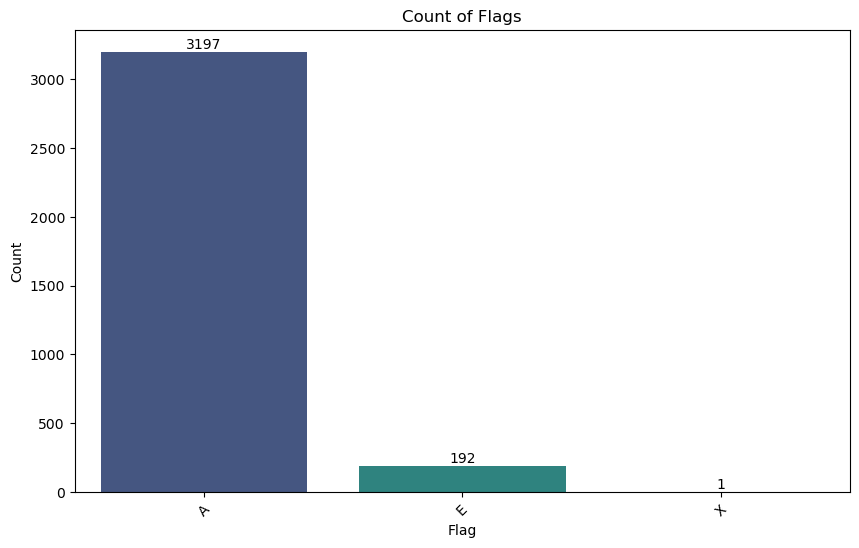

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Flag', data=crop_df, palette='viridis')
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Count of Flags')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()




Getting box plot of top 10 crops to check how 

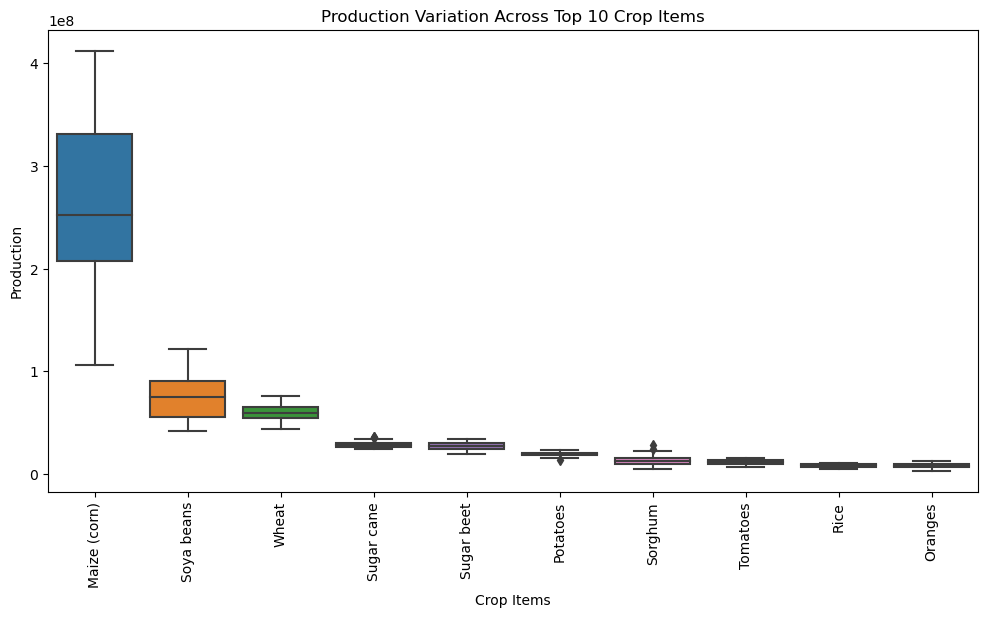

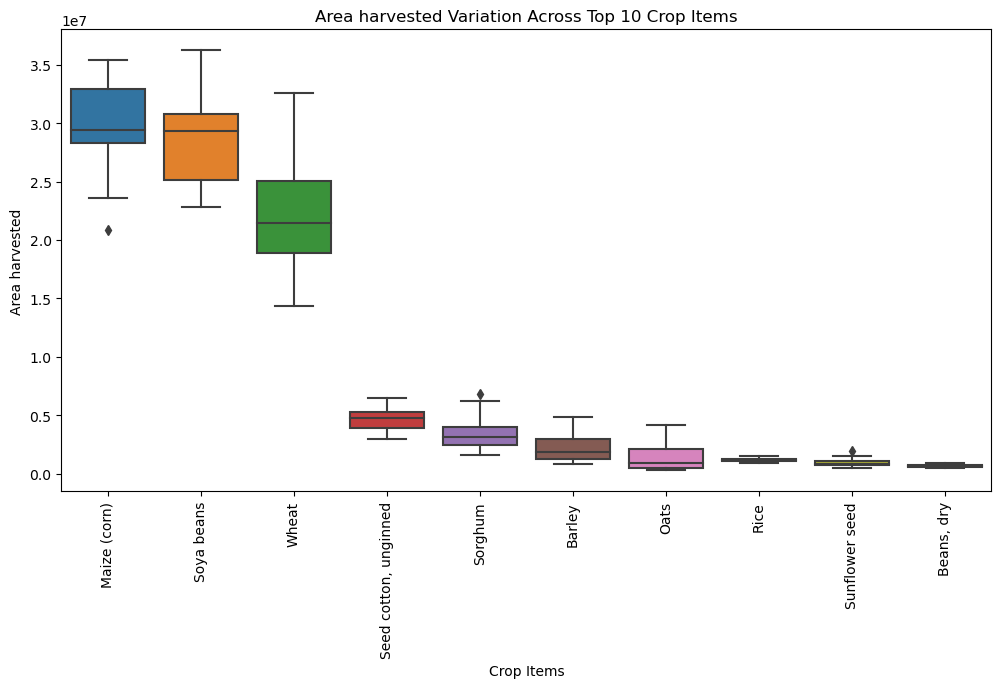

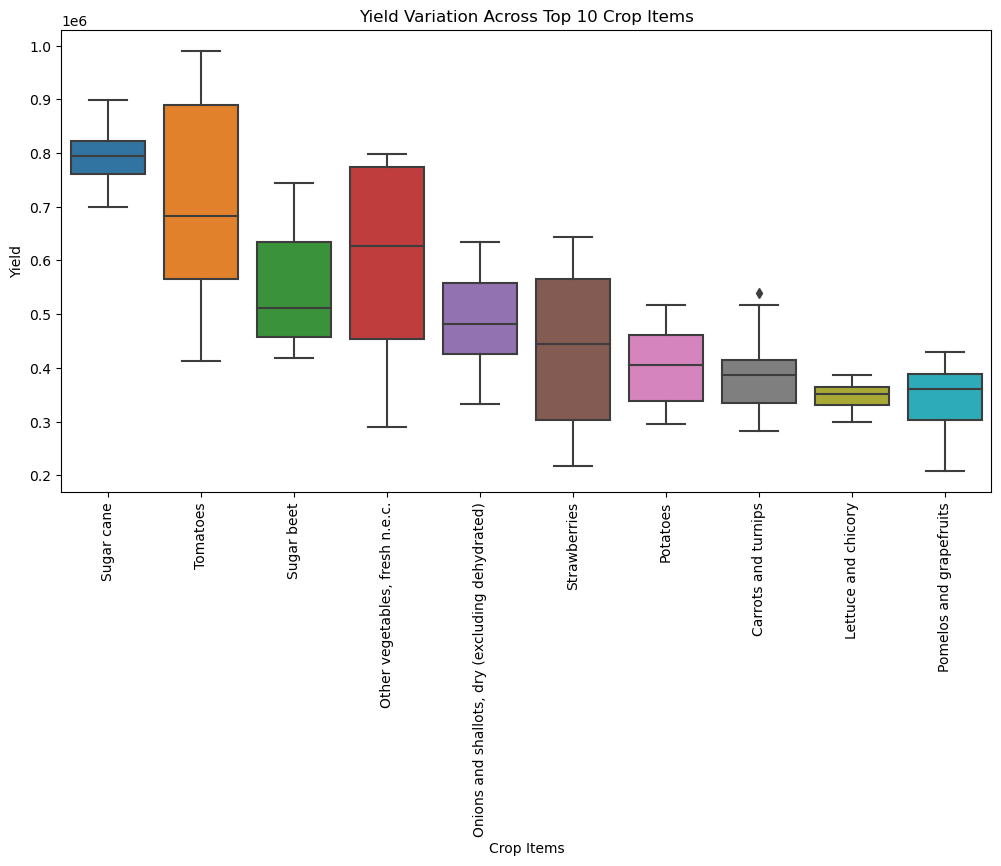

In [18]:
top_10_items = crop_df.groupby('Item')['Production'].sum().nlargest(10).index.tolist()

top_10_crop_data = crop_df[crop_df['Item'].isin(top_10_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='Production', data=top_10_crop_data, order=top_10_items)
plt.xticks(rotation=90)
plt.title('Production Variation Across Top 10 Crop Items')
plt.xlabel('Crop Items')
plt.ylabel('Production')
plt.show()






top_10_items = crop_df.groupby('Item')['Area harvested'].sum().nlargest(10).index.tolist()

top_10_crop_data = crop_df[crop_df['Item'].isin(top_10_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='Area harvested', data=top_10_crop_data, order=top_10_items)
plt.xticks(rotation=90)
plt.title('Area harvested Variation Across Top 10 Crop Items')
plt.xlabel('Crop Items')
plt.ylabel('Area harvested')
plt.show()








top_10_items = crop_df.groupby('Item')['Yield'].sum().nlargest(10).index.tolist()

top_10_crop_data = crop_df[crop_df['Item'].isin(top_10_items)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Item', y='Yield', data=top_10_crop_data, order=top_10_items)
plt.xticks(rotation=90)
plt.title('Yield Variation Across Top 10 Crop Items')
plt.xlabel('Crop Items')
plt.ylabel('Yield')
plt.show()


Production:- being the highest median and narrow range, maize yields are consistent followed ny soyabean and sugarcane.

Area harvested:- Maize (corn) has the highest median area harvested, followed by soybeans and wheat.
The boxes for maize, soybeans, and wheat are relatively narrow, indicating that their area harvested values tend to be clustered around the median.The boxes for some of the other crops, such as rice and sorghum, are wider, showing that their area harvested values are more spread out.

Yield:-Sugar cane has the highest median yield, followed by tomatoes and sugar beet.
Yields vary considerably across crops, with sugar cane and tomatoes showing the widest ranges.
Potatoes, carrots and turnips, and lettuce and chicory have the most consistent yields, with smaller boxes and interquartile ranges

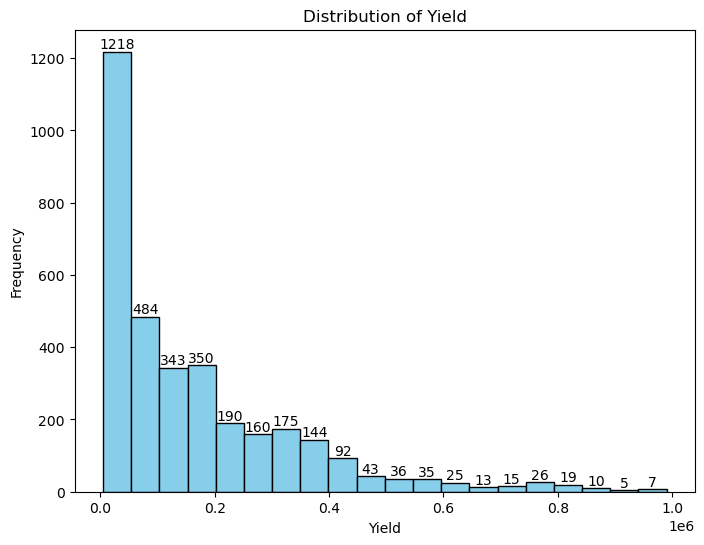

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
hist = plt.hist(crop_df['Yield'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Distribution of Yield')

for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i + 1] - hist[1][i]) / 2, hist[0][i], str(int(hist[0][i])), ha='center', va='bottom')

plt.show()


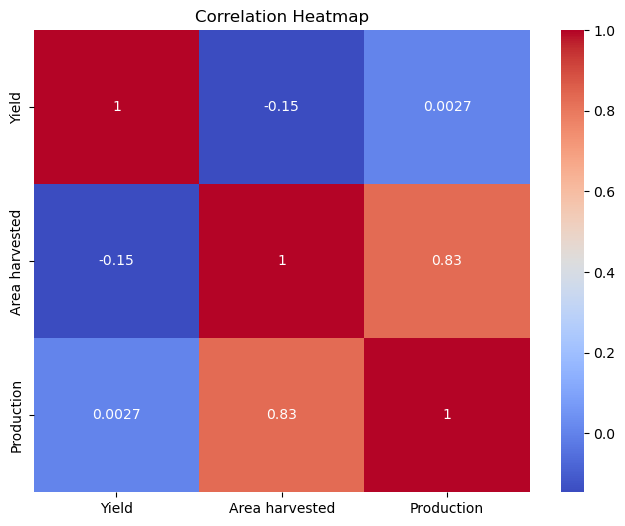

In [20]:
correlation_matrix = crop_df[['Yield', 'Area harvested', 'Production']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



here we can see that the Area Harvested is very much related to the production.
which means more the area harvested more will be the production

Agriculture trends over the years

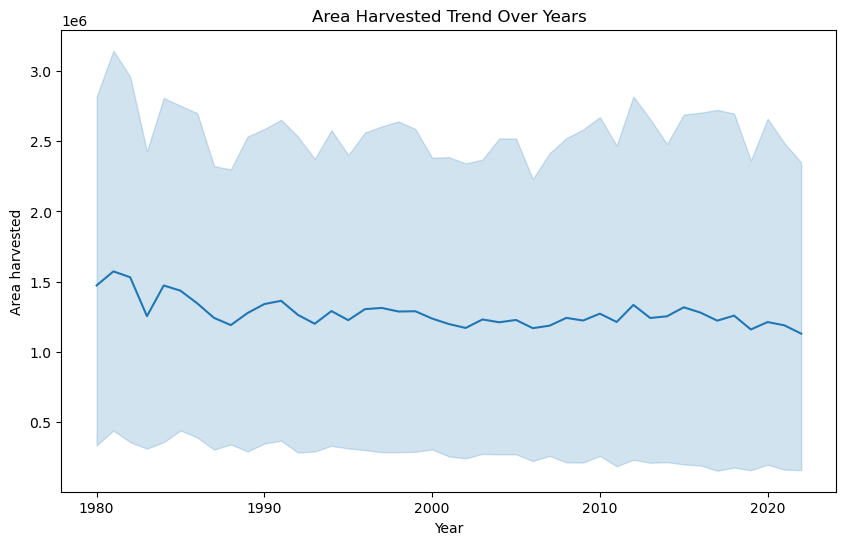

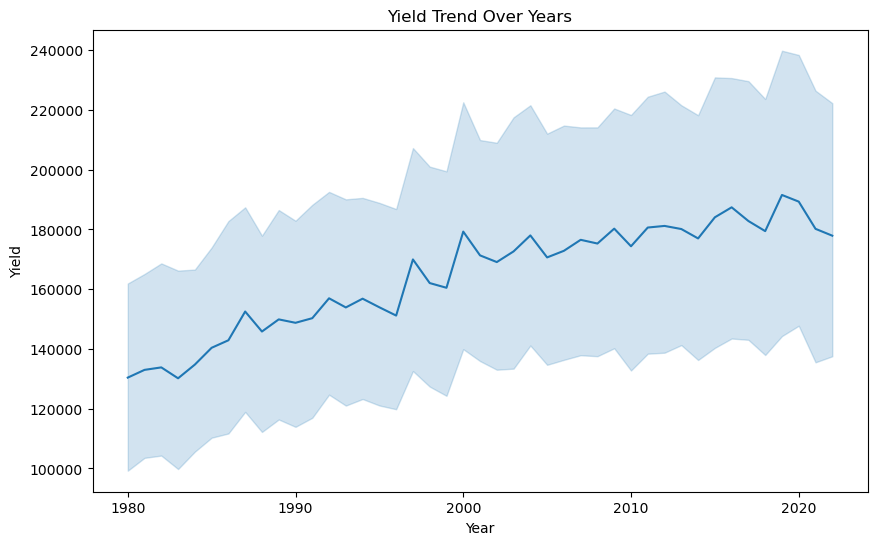

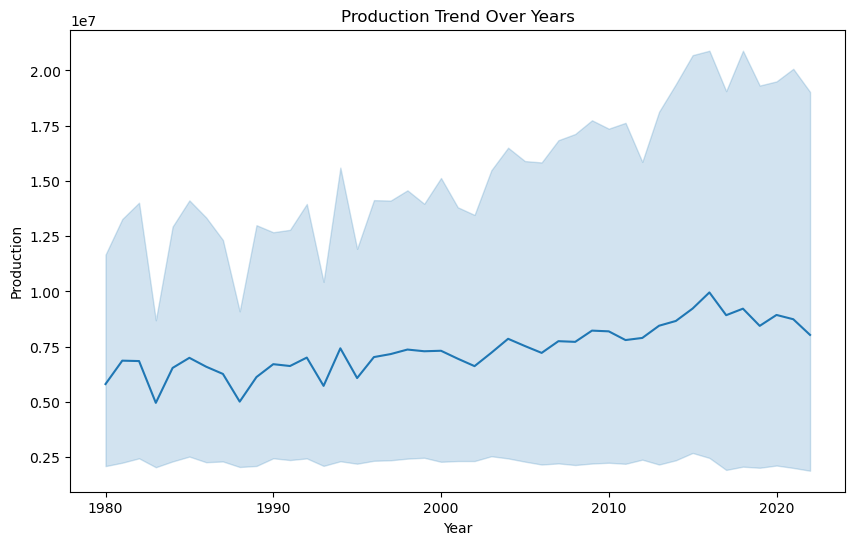

In [21]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Area harvested', data=crop_df)
plt.title('Area Harvested Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Area harvested')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Yield', data=crop_df)
plt.title('Yield Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Production', data=crop_df)
plt.title('Production Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()


Total number of crops in the given data

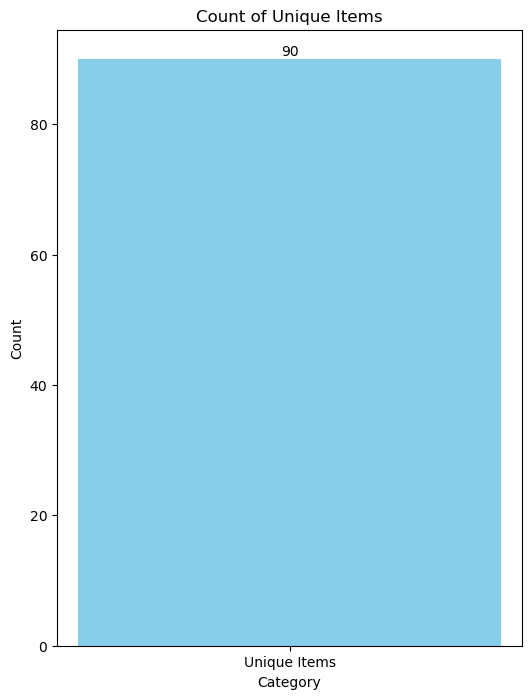

In [22]:
import matplotlib.pyplot as plt

unique_items_count = crop_df['Item'].nunique()

plt.figure(figsize=(6, 8))
bars = plt.bar('Unique Items', unique_items_count, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Unique Items')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.show()


Relation between 'Area harvested' , 'yield' and 'Production' 

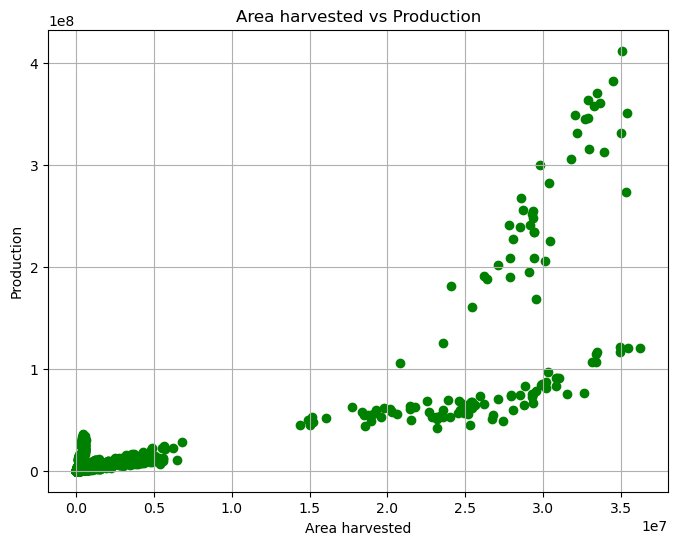

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(crop_df['Area harvested'], crop_df['Production'], color='green')
plt.xlabel('Area harvested')
plt.ylabel('Production')
plt.title('Area harvested vs Production')
plt.grid(True)
plt.show()


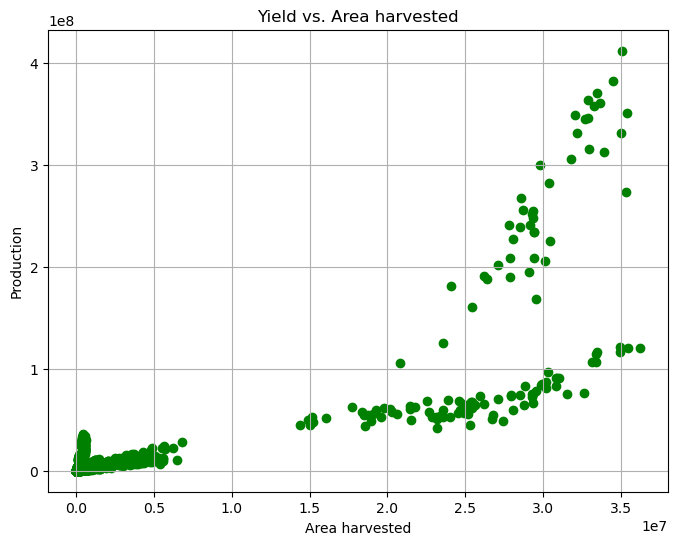

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(crop_df['Area harvested'], crop_df['Production'], color='green')
plt.xlabel('Area harvested')
plt.ylabel('Production')
plt.title('Yield vs. Area harvested')
plt.grid(True)
plt.show()


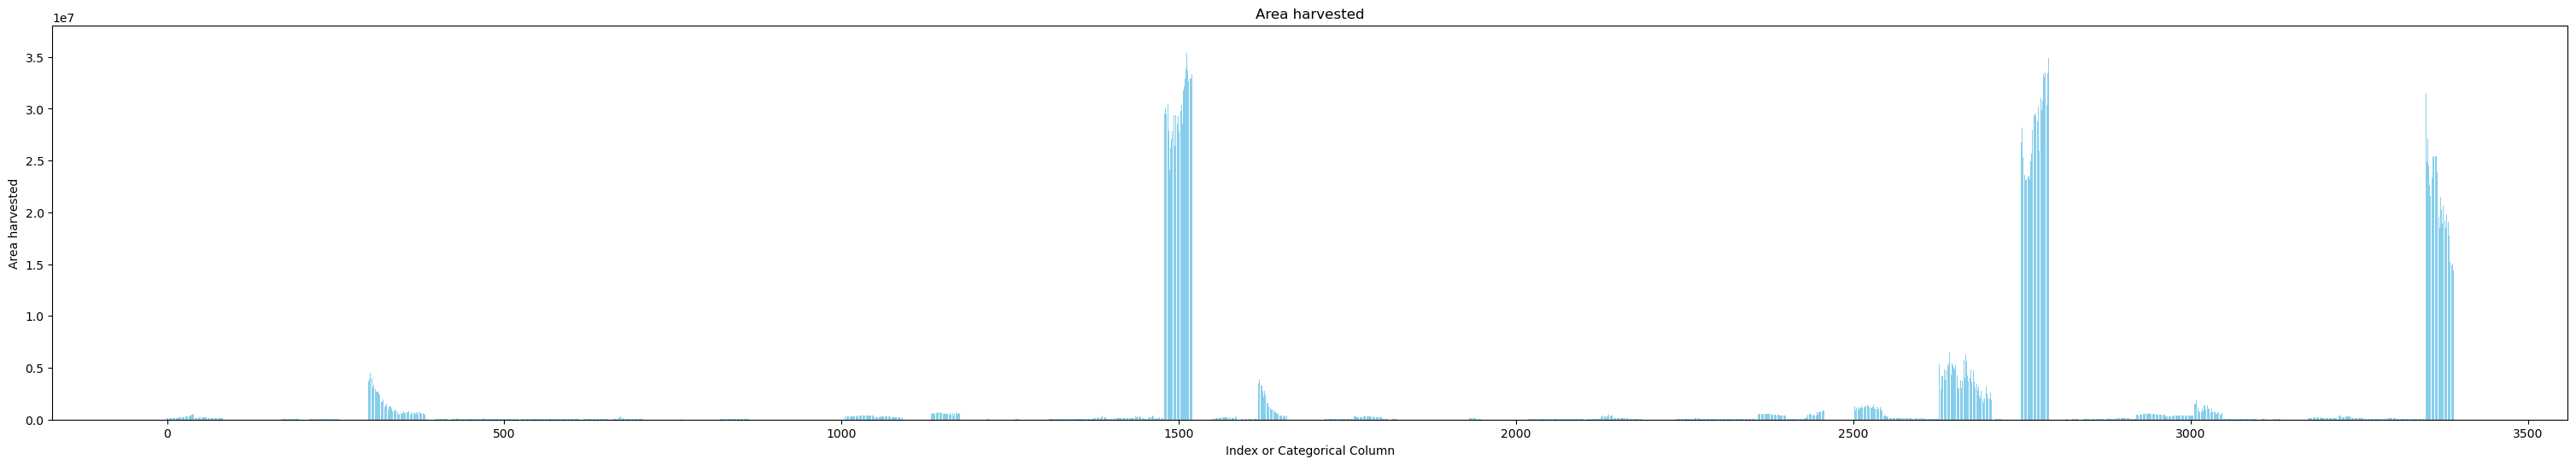

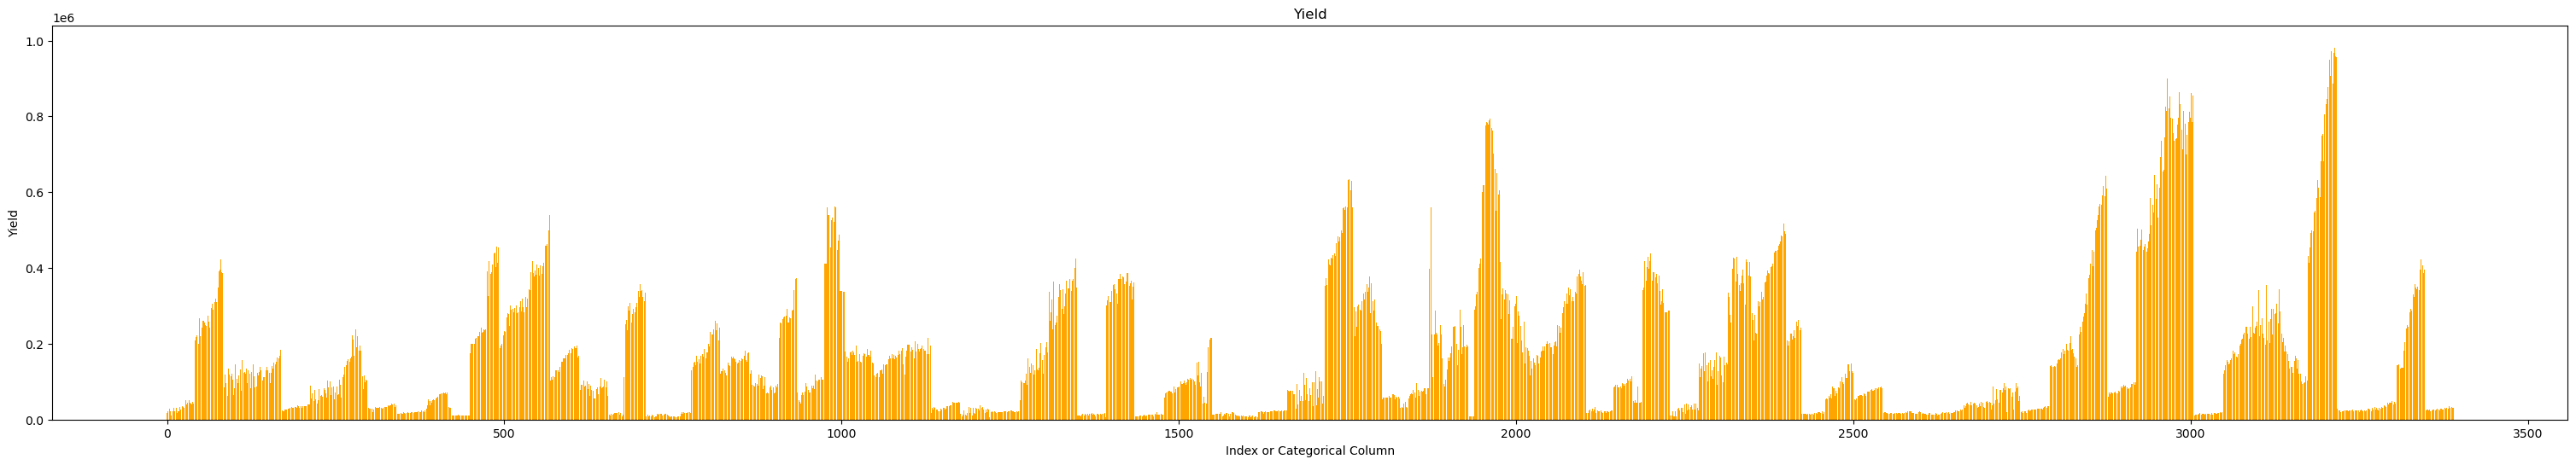

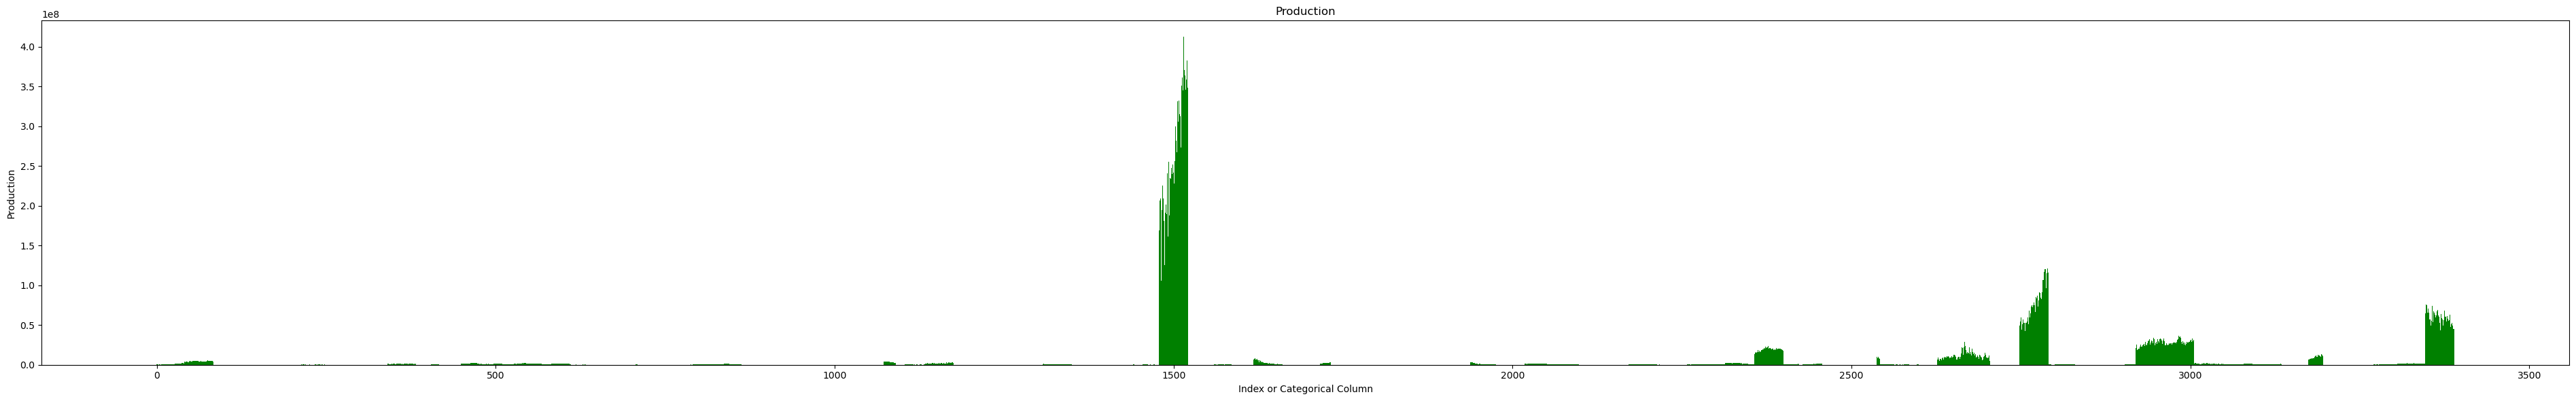

In [25]:
plt.figure(figsize=(38, 6))

plt.bar(crop_df.index, crop_df['Area harvested'], color='skyblue')
plt.xlabel('Index or Categorical Column')
plt.ylabel('Area harvested')
plt.title('Area harvested')




plt.figure(figsize=(38, 6))
plt.bar(crop_df.index, crop_df['Yield'], color='orange')
plt.xlabel('Index or Categorical Column')
plt.ylabel('Yield')
plt.title('Yield')





plt.figure(figsize=(38, 6))
plt.bar(crop_df.index, crop_df['Production'], color='green')
plt.xlabel('Index or Categorical Column')
plt.ylabel('Production')
plt.title('Production')

plt.tight_layout()
plt.show()



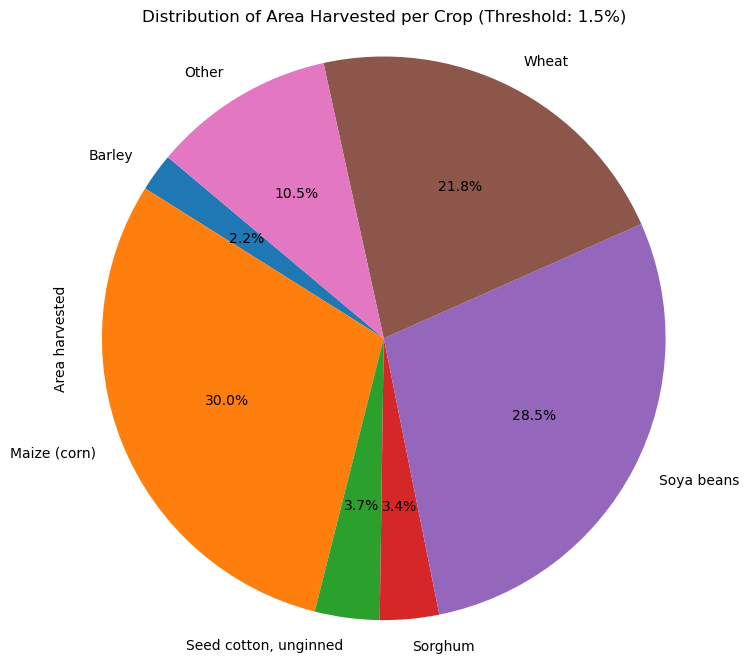

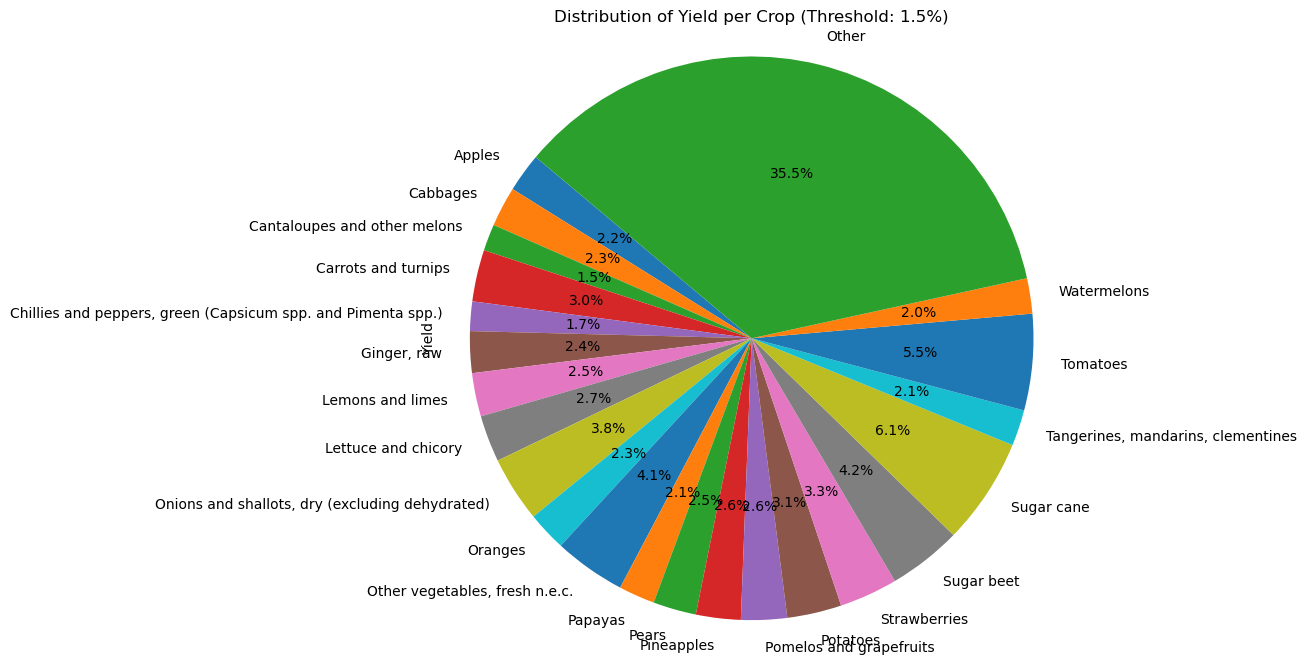

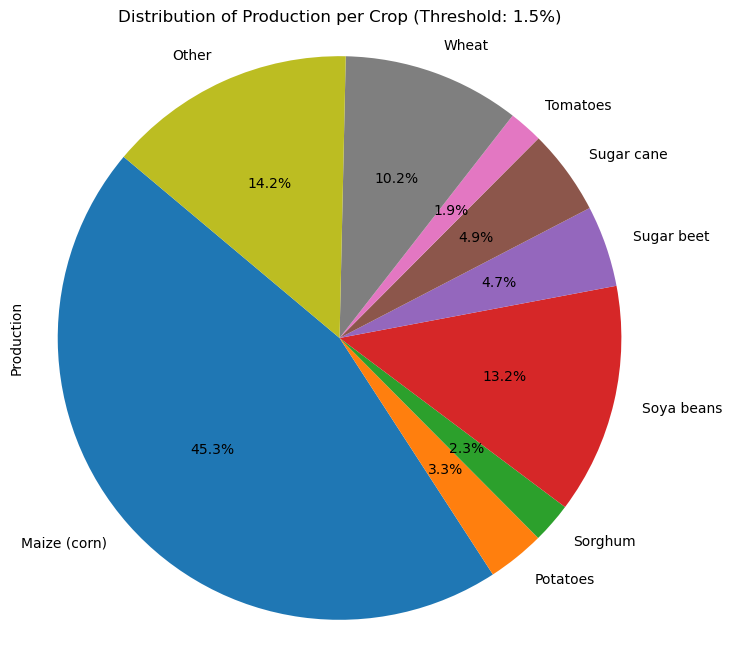

In [26]:
total_area_harvested = crop_df['Area harvested'].sum()

crop_area_percentage = crop_df.groupby('Item')['Area harvested'].sum() / total_area_harvested * 100

threshold = 1.5 # Threshold percentage for grouping into 'Other'
small_crops = crop_area_percentage[crop_area_percentage < threshold]
crop_area_percentage['Other'] = crop_area_percentage[crop_area_percentage < threshold].sum()
crop_area_percentage.drop(small_crops.index, inplace=True)

plt.figure(figsize=(8, 8))
crop_area_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Distribution of Area Harvested per Crop (Threshold: {threshold}%)')
plt.show()



#######################################Yield#############################################



total_yield = crop_df['Yield'].sum()

crop_yield_percentage = crop_df.groupby('Item')['Yield'].sum() / total_yield * 100

threshold = 1.5  # Threshold percentage for grouping into 'Other'
small_yields = crop_yield_percentage[crop_yield_percentage < threshold]
crop_yield_percentage['Other'] = crop_yield_percentage[crop_yield_percentage < threshold].sum()
crop_yield_percentage.drop(small_yields.index, inplace=True)

plt.figure(figsize=(8, 8))
crop_yield_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Distribution of Yield per Crop (Threshold: {threshold}%)')
plt.show()





#######################################Production#############################################



total_production = crop_df['Production'].sum()

crop_production_percentage = crop_df.groupby('Item')['Production'].sum() / total_production * 100

threshold = 1.5  # Threshold percentage for grouping into 'Other'
small_productions = crop_production_percentage[crop_production_percentage < threshold]
crop_production_percentage['Other'] = crop_production_percentage[crop_production_percentage < threshold].sum()
crop_production_percentage.drop(small_productions.index, inplace=True)

plt.figure(figsize=(8, 8))
crop_production_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Distribution of Production per Crop (Threshold: {threshold}%)')
plt.show()


Pareto chart to understand the top Crops 

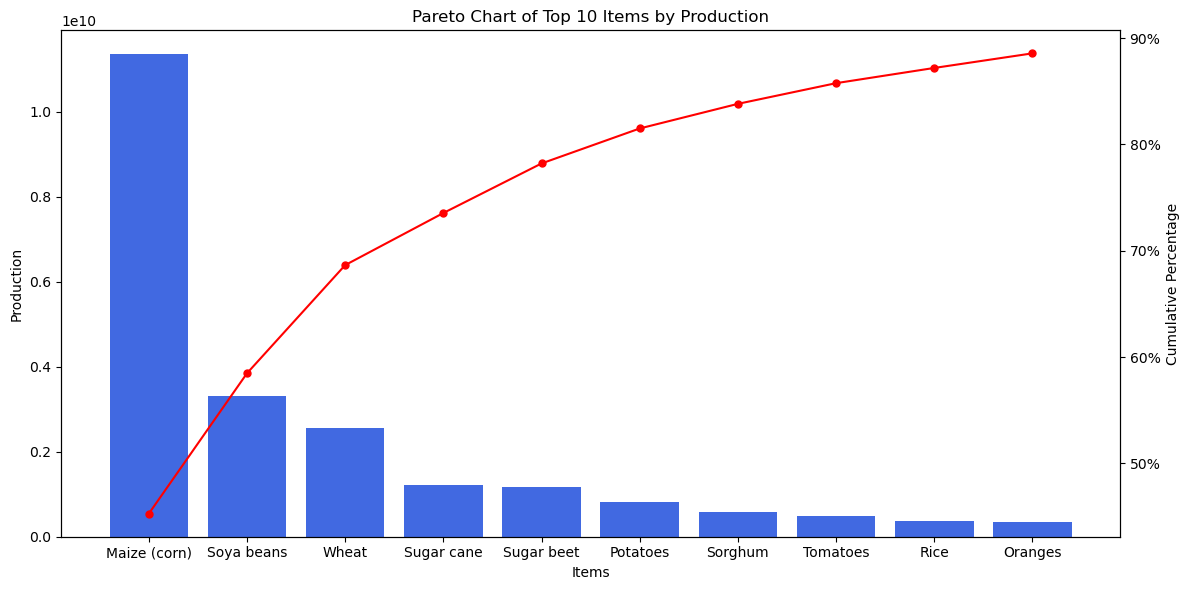

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


item_production = crop_df.groupby('Item')['Production'].sum().sort_values(ascending=False)

cumulative_production = item_production.cumsum() / item_production.sum() * 100

top_10_items = item_production.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed
ax1.bar(top_10_items.index, top_10_items.values, color='royalblue')

ax2 = ax1.twinx()
ax2.plot(top_10_items.index, cumulative_production[top_10_items.index], color='red', marker='o', ms=5)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.title('Pareto Chart of Top 10 Items by Production')
ax1.set_xlabel('Items')
ax1.set_ylabel('Production')
ax2.set_ylabel('Cumulative Percentage')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## Getting Data For one Specific crop

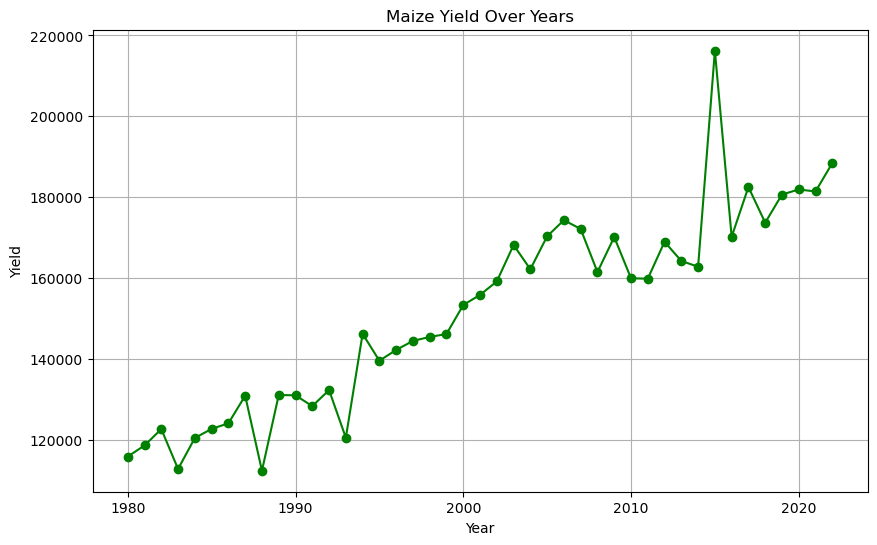

In [28]:
maize_data = crop_df[crop_df['Item'] == 'Green corn (maize)']

plt.figure(figsize=(10, 6))
plt.plot(maize_data['Year'], maize_data['Yield'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Maize Yield Over Years')
plt.grid(True)
plt.show()


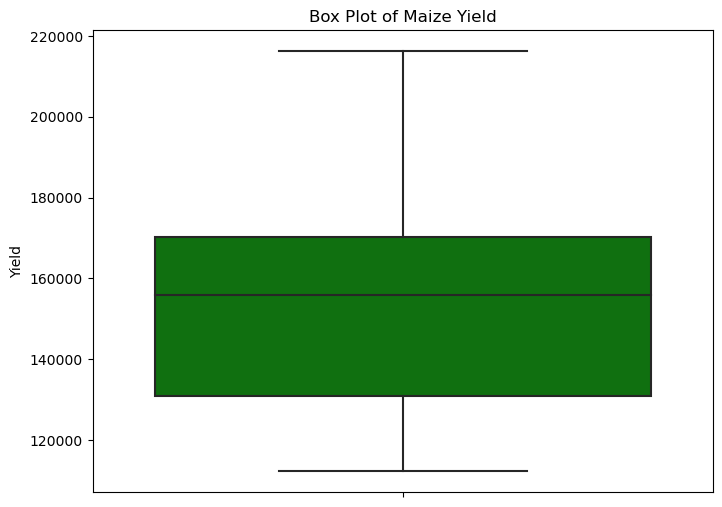

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=maize_data['Yield'], color='green')
plt.ylabel('Yield')
plt.title('Box Plot of Maize Yield')
plt.show()


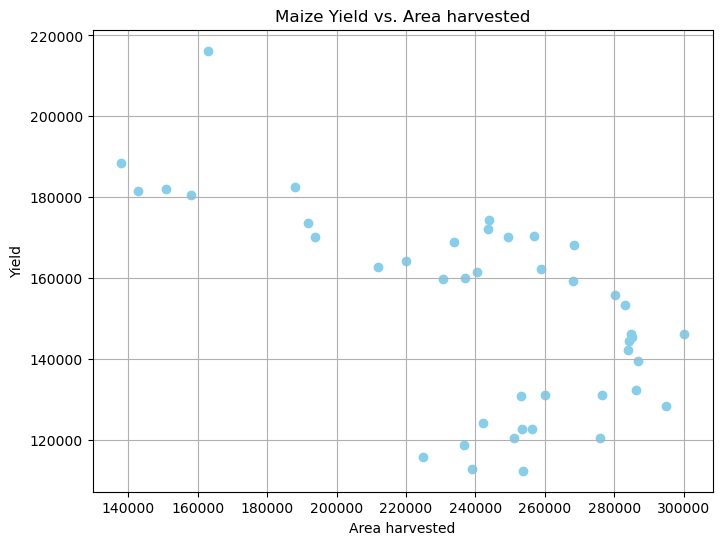

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(maize_data['Area harvested'], maize_data['Yield'], color='skyblue')
plt.xlabel('Area harvested')
plt.ylabel('Yield')
plt.title('Maize Yield vs. Area harvested')
plt.grid(True)
plt.show()


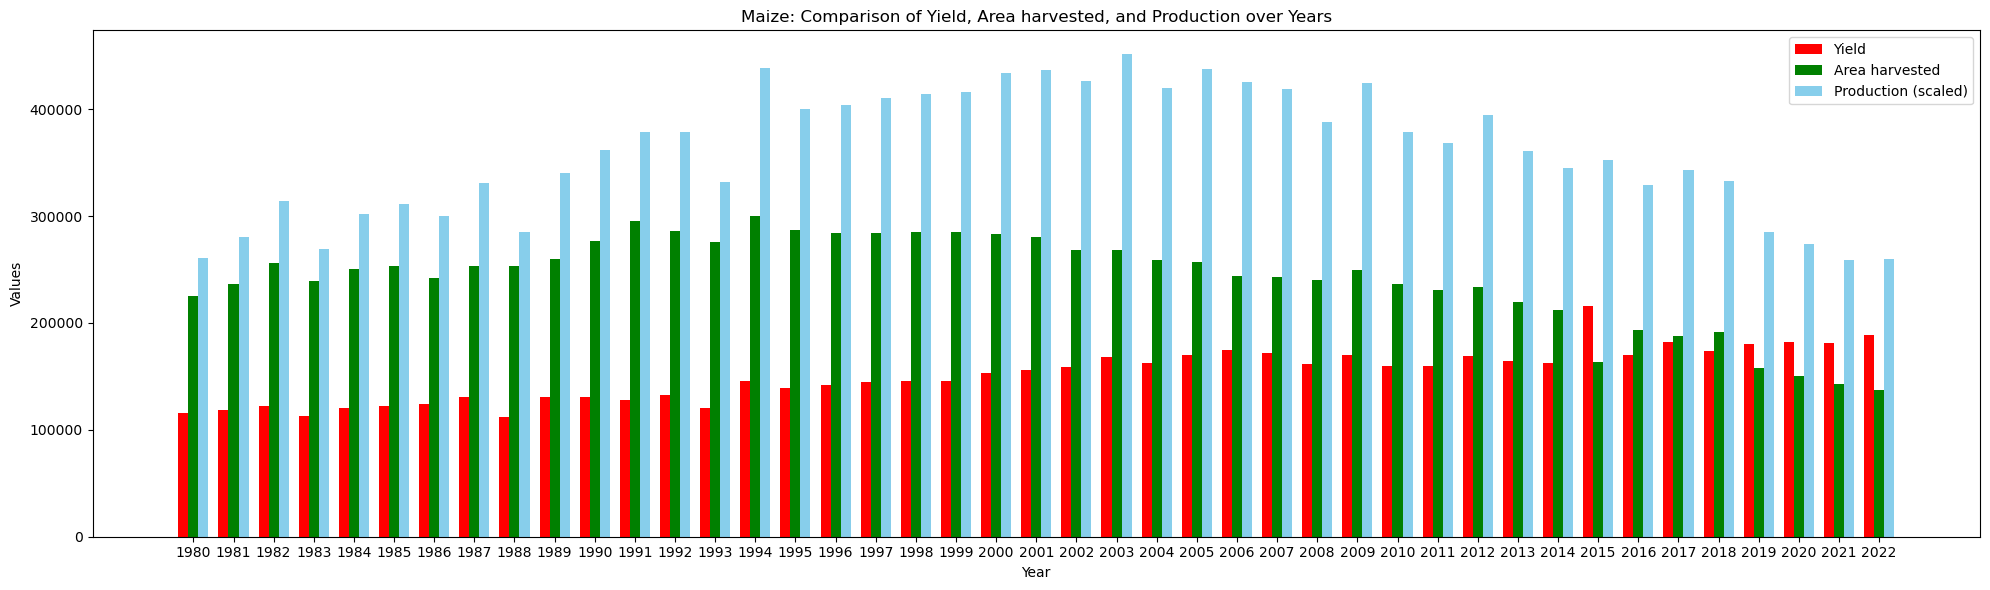

In [31]:
import matplotlib.pyplot as plt
import numpy as np

years = maize_data['Year']
yield_vals = maize_data['Yield']
area_harvested_vals = maize_data['Area harvested']
production_vals = maize_data['Production']

scaled_production = production_vals / 10  # Adjust the scaling factor as needed

bar_width = 0.25  # Width of each bar
index = np.arange(len(years))  # Creating index range for bars

plt.figure(figsize=(20, 6))

plt.bar(index, yield_vals, width=bar_width, label='Yield', color='red')
plt.bar(index + bar_width, area_harvested_vals, width=bar_width, label='Area harvested', color='green')
plt.bar(index + 2 * bar_width, scaled_production, width=bar_width, label='Production (scaled)', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Maize: Comparison of Yield, Area harvested, and Production over Years')
plt.xticks(index + bar_width, years)  # Setting x-axis labels as years
plt.legend()
plt.tight_layout()
plt.show()


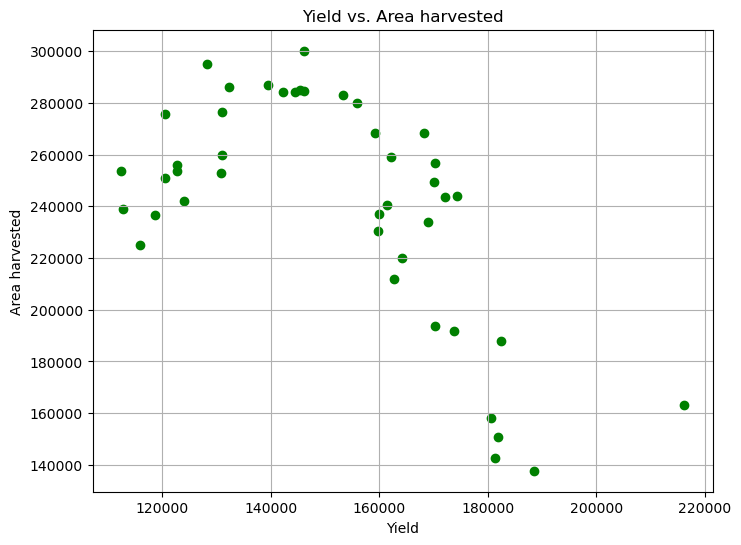

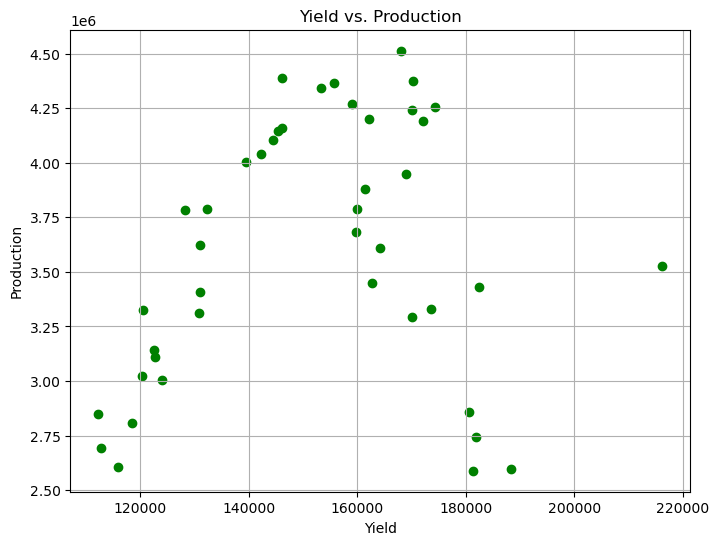

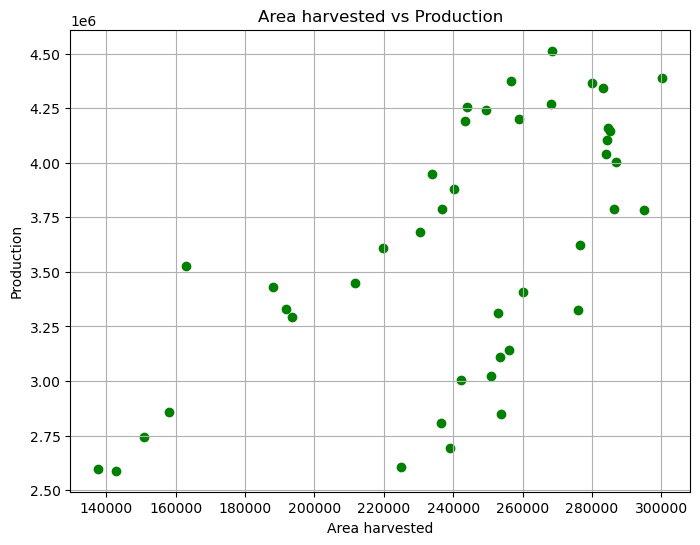

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(maize_data['Yield'], maize_data['Area harvested'], color='green')
plt.xlabel('Yield')
plt.ylabel('Area harvested')
plt.title('Yield vs. Area harvested')
plt.grid(True)
plt.show()



plt.figure(figsize=(8, 6))
plt.scatter(maize_data['Yield'], maize_data['Production'], color='green')
plt.xlabel('Yield')
plt.ylabel('Production')
plt.title('Yield vs. Production')
plt.grid(True)
plt.show()




plt.figure(figsize=(8, 6))
plt.scatter(maize_data['Area harvested'], maize_data['Production'], color='green')
plt.xlabel('Area harvested')
plt.ylabel('Production')
plt.title('Area harvested vs Production')
plt.grid(True)
plt.show()


# 2. Weather Data

In [33]:
weather_df = pd.read_csv(input_folder+'Cleaned_USA_Weather_Data.csv')

In [34]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           15335 non-null  int64  
 1   Month                          15335 non-null  int64  
 2   Day                            15335 non-null  int64  
 3   Surface Pressure               15335 non-null  float64
 4   Wind Speed at 10 Meters        15335 non-null  float64
 5   Precipitation Corrected        15335 non-null  float64
 6   Specific Humidity at 2 Meters  15335 non-null  float64
 7   Earth Skin Temperature         15335 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 958.6 KB


In [35]:
weather_df.nunique()

YEAR                               42
Month                              12
Day                                31
Surface Pressure                  399
Wind Speed at 10 Meters          1029
Precipitation Corrected          1313
Specific Humidity at 2 Meters     273
Earth Skin Temperature           4142
dtype: int64

In [36]:
weather_df.describe()

,YEAR,Month,Day,Surface Pressure,Wind Speed at 10 Meters,Precipitation Corrected,Specific Humidity at 2 Meters,Earth Skin Temperature
count,15335.00000,15335.000000,15335.000000,15335.000000,15335.000000,15335.000000,15335.000000,15335.000000
mean,2002.49299,6.521291,15.724878,90.410243,4.978882,1.363178,5.781926,11.272640
std,12.11724,3.447919,8.798330,0.579289,1.797432,3.621963,3.660728,11.400341
min,1982.00000,1.000000,1.000000,87.810000,1.010000,0.000000,0.240000,-23.550000
25%,1992.00000,4.000000,8.000000,90.050000,3.730000,0.000000,2.810000,1.240000
50%,2002.00000,7.000000,16.000000,90.440000,4.700000,0.030000,4.520000,10.970000
75%,2013.00000,10.000000,23.000000,90.800000,5.890000,0.790000,8.540000,21.555000
max,2023.00000,12.000000,31.000000,92.600000,16.580000,56.470000,17.700000,34.970000


In [37]:
weather_df.head()

,YEAR,Month,Day,Surface Pressure,Wind Speed at 10 Meters,Precipitation Corrected,Specific Humidity at 2 Meters,Earth Skin Temperature
0,1982,1,1,89.33,8.42,0.01,2.08,-3.57
1,1982,1,2,89.30,5.48,0.89,1.59,-5.80
2,1982,1,3,89.72,4.20,0.86,1.46,-7.63
3,1982,1,4,89.72,5.70,0.00,1.65,-4.06
4,1982,1,5,89.41,5.45,0.57,1.59,-5.44


## EDA forAgriculture Data

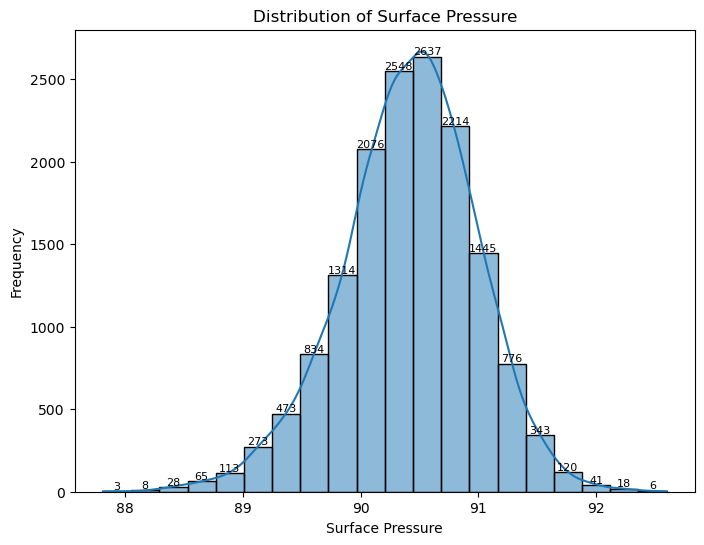

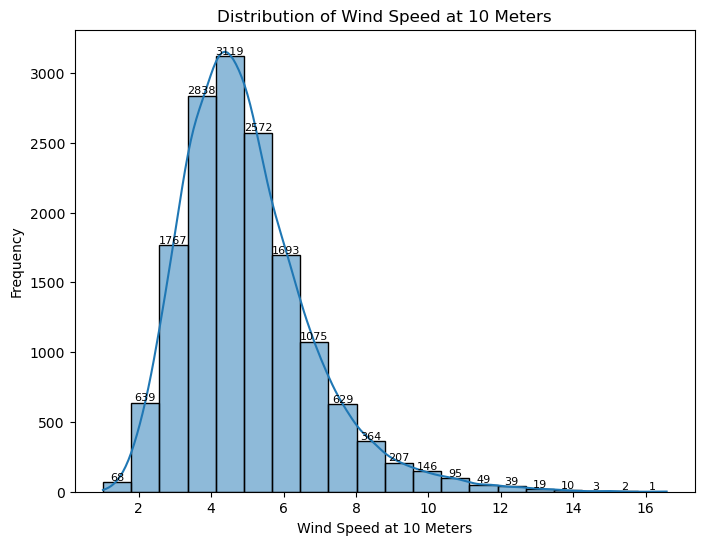

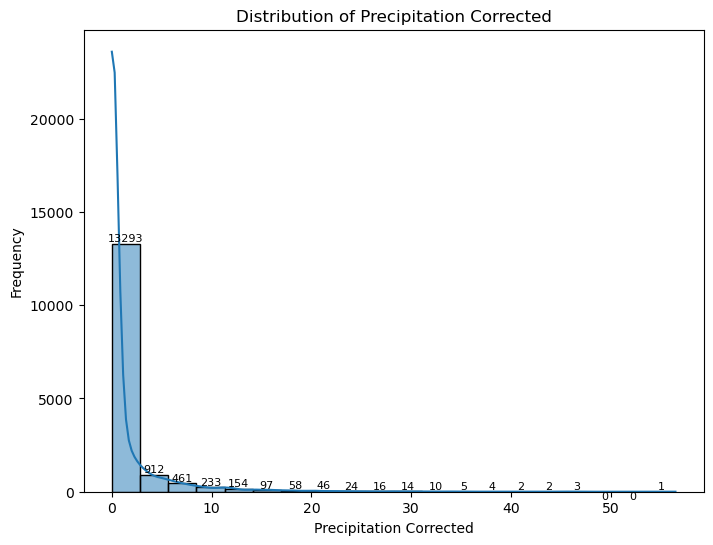

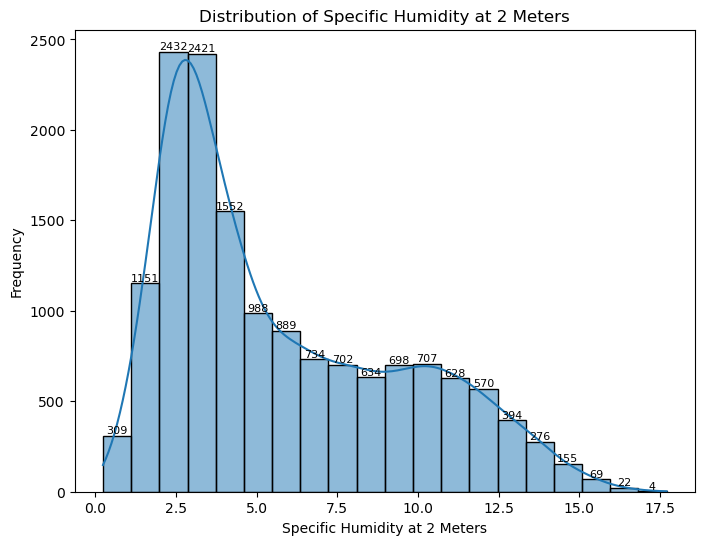

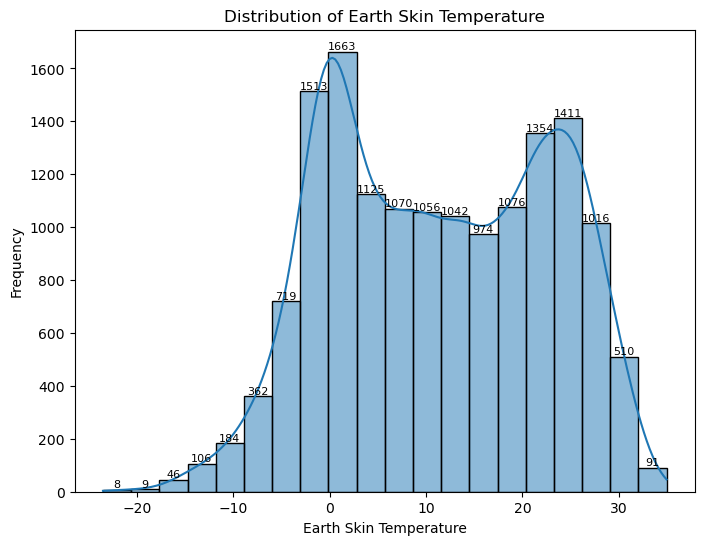

In [38]:
for column in weather_df.columns:
    if weather_df[column].dtype in ['float64', 'int64'] and column not in ('YEAR', 'Month', 'Day'):
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(weather_df[column], bins=20, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        for rect in ax.patches:
            height = rect.get_height()
            plt.text(
                rect.get_x() + rect.get_width() / 2,  
                height,  
                f'{height:.0f}', 
                ha='center',  
                va='bottom' if height > 0 else 'top',  
                fontsize=8,  
                color='black'  
            )

        plt.show()


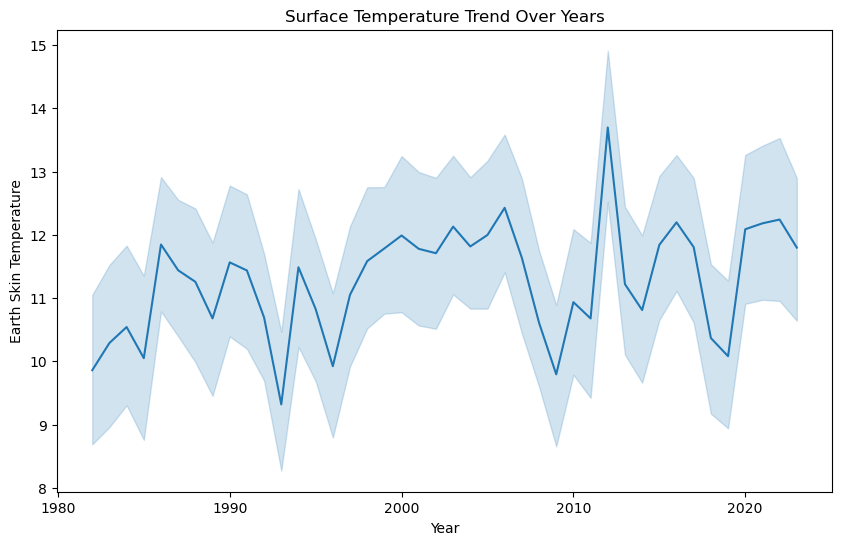

In [39]:

# Trend of Earth Skin Temperature over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='Earth Skin Temperature', data=weather_df)
plt.title('Surface Temperature Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Earth Skin Temperature')
plt.show()


C:\Users\ROG\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


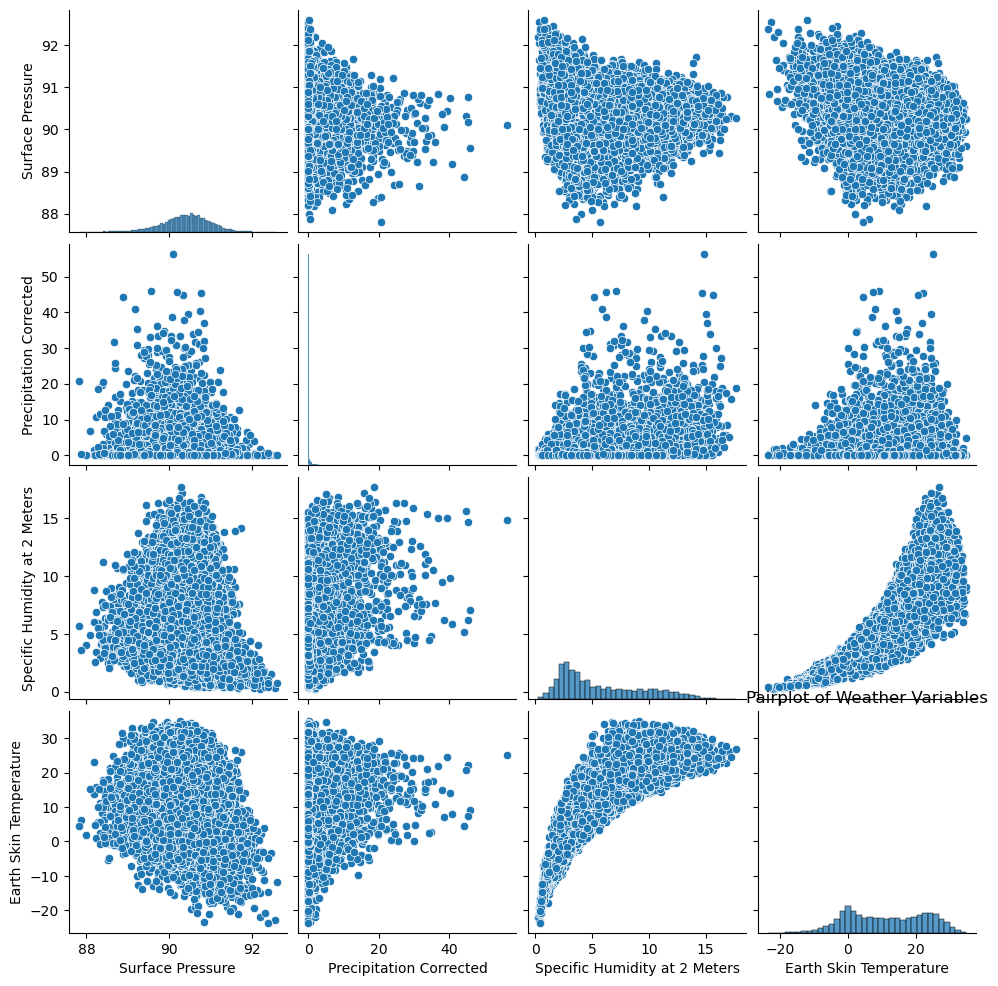

In [40]:
sns.pairplot(weather_df[['Surface Pressure', 'Precipitation Corrected', 'Specific Humidity at 2 Meters', 'Earth Skin Temperature']])
plt.title('Pairplot of Weather Variables')
plt.show()


C:\Users\ROG\AppData\Local\Temp\ipykernel_35812\1632698022.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Precipitation Corrected', data=weather_df, ci=None)


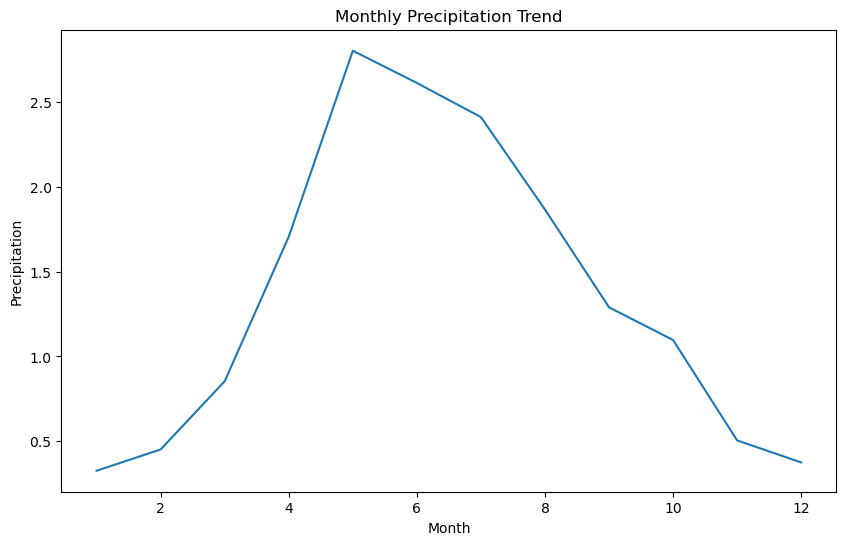

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Precipitation Corrected', data=weather_df, ci=None)
plt.title('Monthly Precipitation Trend')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.show()


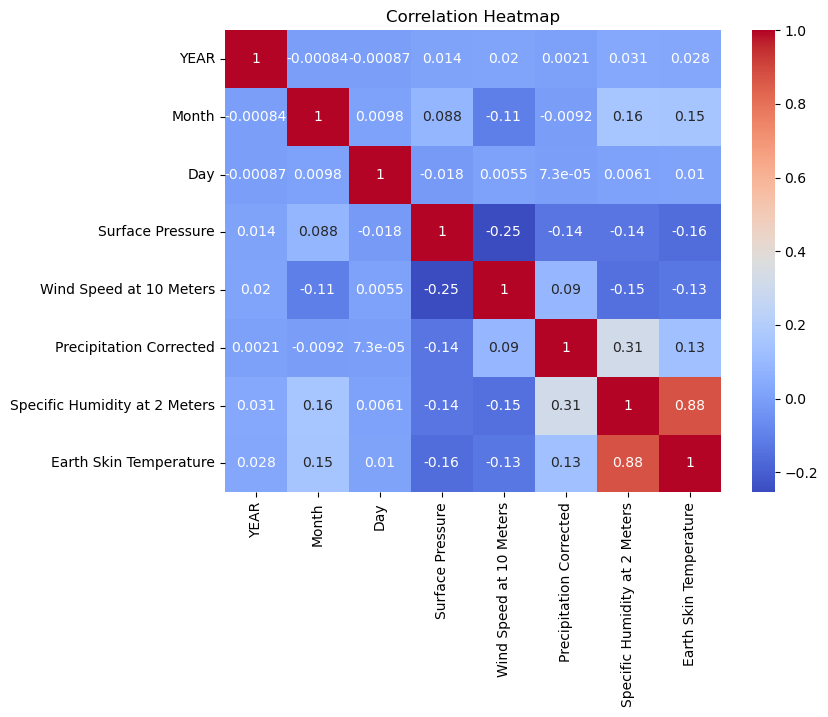

In [42]:
correlation_matrix = weather_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



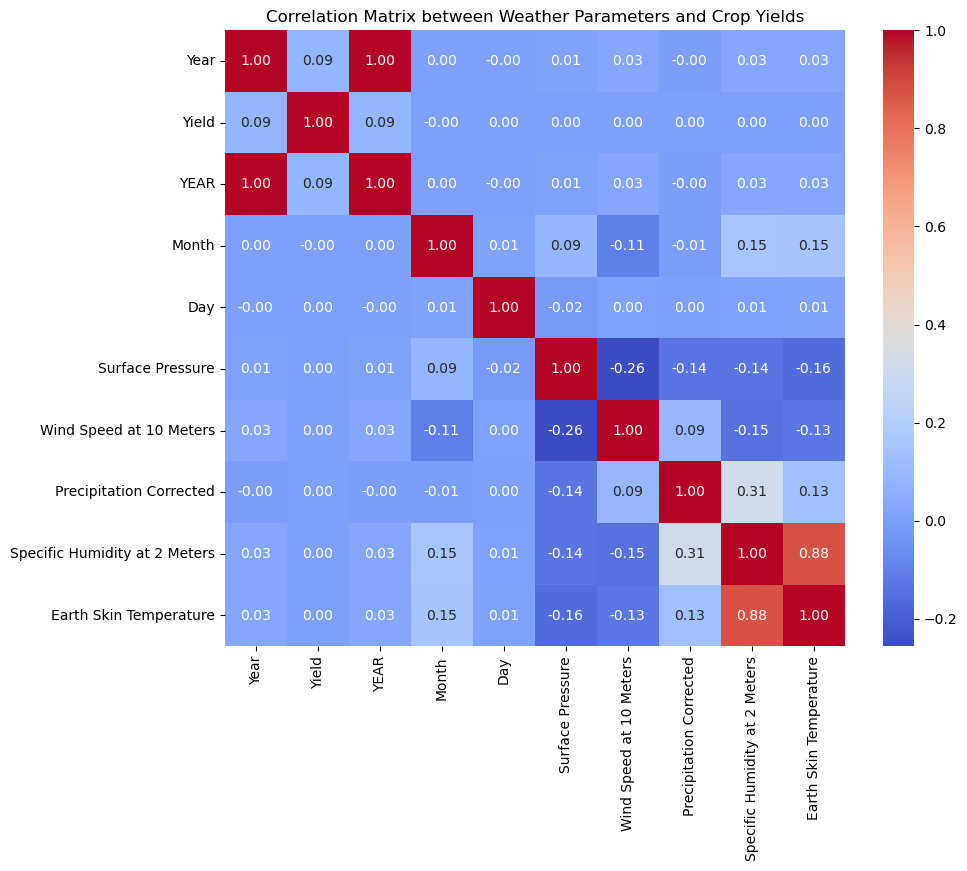

In [43]:
crop_columns_to_merge = ['Year', 'Yield']  

merged_df = pd.merge(crop_df[crop_columns_to_merge], weather_df, left_on='Year', right_on='YEAR', how='inner')

correlation_matrix = merged_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Weather Parameters and Crop Yields')
plt.show()


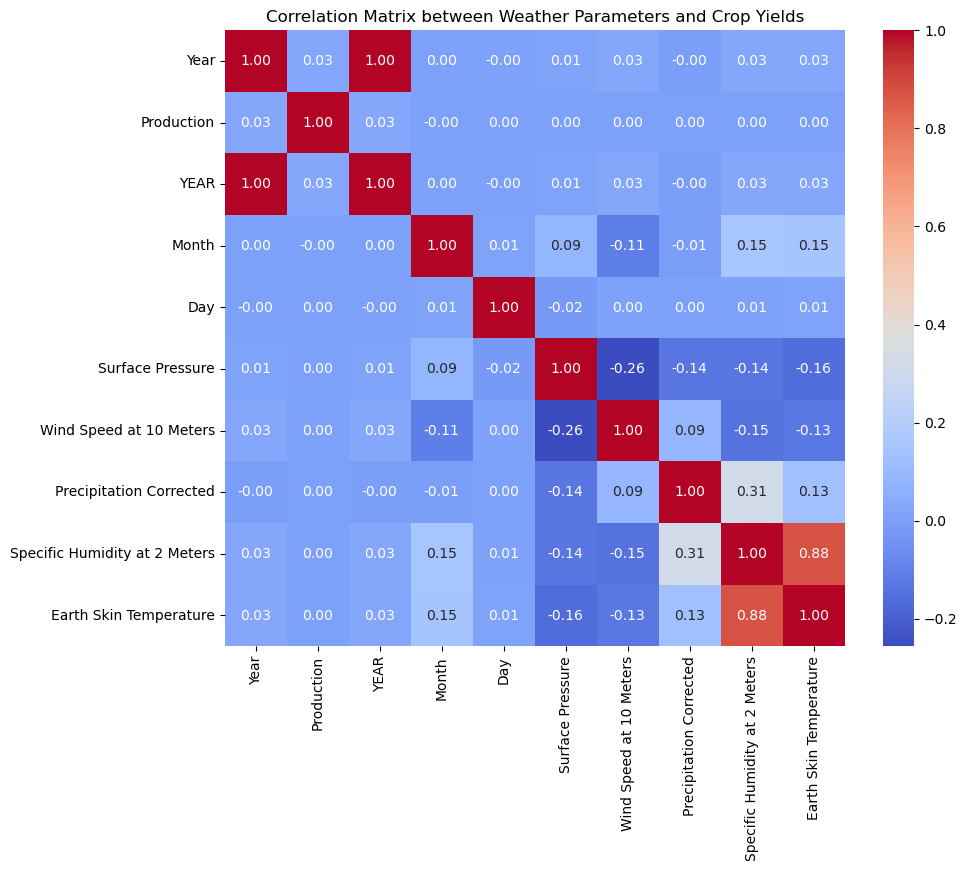

In [44]:

crop_columns_to_merge = ['Year', 'Production']


merged_df = pd.merge(crop_df[crop_columns_to_merge], weather_df, left_on='Year', right_on='YEAR', how='inner')


correlation_matrix = merged_df.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Weather Parameters and Crop Yields')
plt.show()


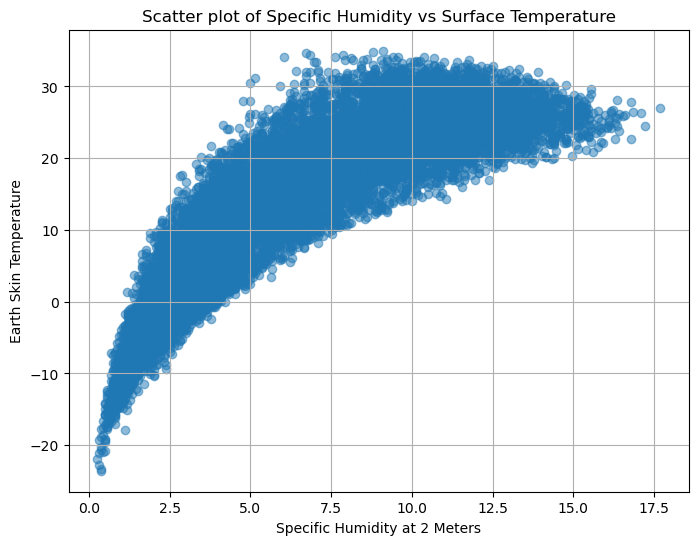

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(weather_df['Specific Humidity at 2 Meters'], weather_df['Earth Skin Temperature'], alpha=0.5)
plt.title('Scatter plot of Specific Humidity vs Surface Temperature')
plt.xlabel('Specific Humidity at 2 Meters')
plt.ylabel('Earth Skin Temperature')
plt.grid(True)
plt.show()



# Feature Engineering

#### Getting Crop Data

In [46]:
crop_data = crop_df.drop(columns =  ['Domain' , 'Area' , 'Flag' , 'Flag Description' ])

In [47]:
numerical_cols = [col for col in crop_data.columns if crop_data[col].dtypes != 'O']
categorical_cols = [col for col in crop_data.columns if crop_data[col].dtypes == 'O']


#### Getting Weather Data

In [48]:
weather_data = weather_df.groupby(['YEAR', 'Month']).mean().reset_index().drop('Day' , axis = 1)

In [49]:
weather_data.rename(columns = {'YEAR' : 'Year'}  , inplace = True)
weather_data = weather_data.groupby(['Year']).mean().reset_index().drop('Month' , axis = 1)

In [50]:
merged_data = pd.merge(crop_data, weather_data, on=['Year'])

In [51]:
merged_data

,Item,Year,Area harvested,Yield,Production,Surface Pressure,Wind Speed at 10 Meters,Precipitation Corrected,Specific Humidity at 2 Meters,Earth Skin Temperature
0,"Almonds, in shell",1982,137190.0,18748.0,257200.0,90.335718,4.885302,1.549085,5.690739,9.789847
1,Apples,1982,169280.0,217631.0,3684060.0,90.335718,4.885302,1.549085,5.690739,9.789847
2,Apricots,1982,9100.0,117835.0,107230.0,90.335718,4.885302,1.549085,5.690739,9.789847
3,Artichokes,1982,4638.0,113702.0,52735.0,90.335718,4.885302,1.549085,5.690739,9.789847
4,Asparagus,1982,32700.0,22936.0,75000.0,90.335718,4.885302,1.549085,5.690739,9.789847
...,...,...,...,...,...,...,...,...,...,...
3234,Tomatoes,2016,141289.0,911398.0,12877049.0,90.432391,5.052189,1.411612,6.186856,12.178601
3235,Unmanufactured tobacco,2016,129360.0,22045.0,285180.0,90.432391,5.052189,1.411612,6.186856,12.178601
3236,"Walnuts, in shell",2016,127480.0,49031.0,625050.0,90.432391,5.052189,1.411612,6.186856,12.178601
3237,Watermelons,2016,45490.0,396338.0,1802940.0,90.432391,5.052189,1.411612,6.186856,12.178601


In [52]:
crop_data_encoded = pd.get_dummies(merged_data, columns=['Item'])


In [53]:
crop_harvested = crop_data_encoded.drop(columns = ['Yield' , 'Production'])

crop_yield = crop_data_encoded.drop(columns = ['Area harvested' , 'Production'])

crop_production = crop_data_encoded.drop(columns = ['Area harvested' , 'Yield'])

### Checking the most imp features which has good relationship with the the target variable

In [54]:
features = crop_yield.drop(columns=['Yield'])


In [55]:
from sklearn.feature_selection import mutual_info_classif

target = crop_yield['Yield']


importance_scores = mutual_info_classif(features, target)


feature_importance = pd.DataFrame(importance_scores, index=features.columns, columns=['Importance'])


print(feature_importance)


                               Importance
Year                             0.528392
Surface Pressure                 0.000000
Wind Speed at 10 Meters          0.090657
Precipitation Corrected          0.000000
Specific Humidity at 2 Meters    0.000000
...                                   ...
Item_True hemp, raw or retted    0.000000
Item_Unmanufactured tobacco      0.089963
Item_Walnuts, in shell           0.067433
Item_Watermelons                 0.000000
Item_Wheat                       0.000000

[95 rows x 1 columns]


In [56]:

for col in merged_data.columns:
    #print(col)
    if (col in feature_importance.index):
        print(col , feature_importance.loc[col ,'Importance' ])

Year 0.5283924389213999
Surface Pressure 0.0
Wind Speed at 10 Meters 0.09065690661787906
Precipitation Corrected 0.0
Specific Humidity at 2 Meters 0.0
Earth Skin Temperature 0.09539601501576733


In [57]:

for col in merged_data.columns:
    #print(col)
    if (col in feature_importance.index) and feature_importance.loc[col ,'Importance' ] == 0.0:
        print(col , feature_importance.loc[col ,'Importance' ])

Surface Pressure 0.0
Precipitation Corrected 0.0
Specific Humidity at 2 Meters 0.0


In [58]:
merged_data.drop(columns = ['Specific Humidity at 2 Meters' , 'Precipitation Corrected'] , inplace = True)

# Predictive Modelling

### Prediction For Yield

In [59]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = crop_data_encoded.drop(columns=['Yield', 'Production' , 'Area harvested'])  
y = crop_data_encoded['Yield']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 1920731277.427926
R-squared (R2): 0.9369315117506353
Coefficients: [ 1.32219206e+03  2.94237928e+04  1.00074975e+04  2.46671788e+04
 -9.55087571e+03  5.28725438e+03 -1.25398014e+05  1.33570955e+05
 -3.54926782e+04 -2.33144549e+04 -1.25694743e+05 -8.82762700e+04
 -4.15546728e+03 -1.26313153e+05 -1.37319252e+05 -1.05149037e+05
 -1.33294910e+05 -1.41685648e+05  1.42414660e+05  1.02777783e+05
  2.37431727e+05  4.72479546e+02 -7.36058315e+04 -1.55717898e+05
  1.30316061e+05 -1.47342475e+05 -1.45131447e+05  2.86986742e+04
 -5.83280067e+03 -6.00432949e+04  1.38136691e+05 -7.18576662e+04
  2.89989265e+05  1.05416701e+04 -2.59247497e+03  2.81403143e+04
 -1.24914365e+05 -1.36049421e+05 -1.76540722e+05 -1.38875154e+05
 -1.88716179e+04  1.71401244e+05 -1.47692419e+05  1.93298469e+05
 -1.46708402e+05 -6.93443167e+04 -3.31977494e+04 -1.43052454e+05
 -1.57317866e+05 -1.36161388e+05 -7.39294376e+04 -8.15783582e+04
  3.42167615e+05  1.32283650e+05 -1.04687915e+05 -7.58988820e+

In [60]:
yield_accuracy = model.score(X_test, y_test)

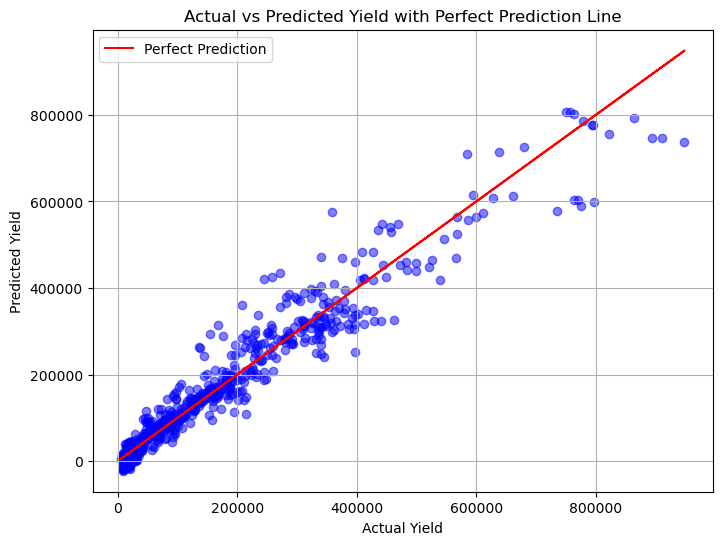

In [61]:
# Plotting a line representing perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Yield with Perfect Prediction Line')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


### Prediction For Production

In [62]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = crop_data_encoded.drop(columns=[ 'Yield' , 'Production' , 'Area harvested'])  
y = crop_data_encoded['Production']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 148006525760810.66
R-squared (R2): 0.8254422926285505
Coefficients: [ 8.01757136e+04 -1.36120637e+06  2.43485744e+05 -2.82236827e+05
  8.72927508e+05 -1.83179586e+05 -5.82759670e+06 -2.16057847e+06
 -6.49348307e+06 -6.63786748e+06 -6.67025152e+06 -6.56849856e+06
 -6.65352601e+06 -8.33868412e+05 -5.52003672e+06 -6.94724379e+06
 -7.07367910e+06 -6.29562160e+06 -5.20927413e+06 -6.25749780e+06
 -5.34229033e+06 -5.71144417e+06 -6.57134618e+06 -7.33952102e+06
 -6.17985287e+06 -6.79097971e+06 -6.95884362e+06 -6.48208037e+06
 -5.97185110e+06 -6.55972039e+06 -6.28372239e+06 -6.67233158e+06
 -6.56745173e+06 -7.93764326e+05 -3.21803036e+06 -6.46548623e+06
 -4.81074825e+06 -6.88676767e+06 -8.32956914e+06 -6.82993377e+06
 -6.61102674e+06 -5.96772607e+06 -6.72948359e+06 -2.91447156e+06
 -6.58464227e+06  2.74077050e+08 -6.18639745e+06 -6.52595302e+06
 -7.13620081e+06 -4.12159124e+06 -6.15283602e+06 -6.61343947e+06
 -3.78918999e+06  1.21693834e+06 -6.54875831e+06 -6.17771726e

In [63]:
Production_accuracy = model.score(X_test, y_test)

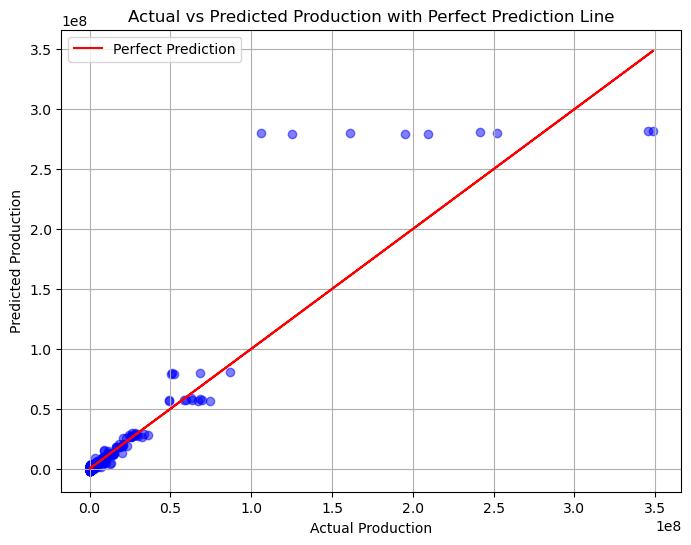

In [64]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Production with Perfect Prediction Line')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.legend()
plt.grid(True)
plt.show()


### Prediction For Area Harvested

In [65]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = crop_data_encoded.drop(columns=[ 'Yield' , 'Production' , 'Area harvested'])  # Features (excluding 'Item', 'Year', and 'Yield')
y = crop_data_encoded['Area harvested']  # Target variable 'Yield'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 724029310747.6123
R-squared (R2): 0.9689510809009768
Coefficients: [-1.05111950e+03 -2.66266092e+05  1.22287360e+04 -7.88838684e+04
  5.65435500e+04 -2.45293283e+04 -8.59676121e+05 -9.81591318e+05
 -1.13452832e+06 -1.13480380e+06 -1.11265827e+06 -1.11493892e+06
 -1.14062863e+06  7.59977846e+05 -5.20557311e+05 -1.10909980e+06
 -1.10894089e+06 -1.06543824e+06 -1.08410881e+06 -1.09283100e+06
 -1.09963788e+06 -1.07018602e+06 -1.11127326e+06 -1.02992638e+06
 -1.10724739e+06 -1.13698913e+06 -1.12988628e+06 -1.12458237e+06
 -1.08149761e+06 -1.14032745e+06 -1.14180476e+06 -1.13461731e+06
 -1.13504592e+06 -7.85590717e+05 -9.03258206e+05 -1.13060880e+06
 -5.45551751e+05 -1.12300581e+06 -1.11331749e+06 -1.12073455e+06
 -1.13705641e+06 -1.11227535e+06 -1.00142344e+06 -1.02757804e+06
 -9.88546337e+05  2.95898308e+07 -1.14983836e+06 -9.80302303e+05
 -1.10021518e+06  1.37165453e+05 -1.14334575e+06 -1.12785469e+06
 -1.08031566e+06 -8.70869637e+05 -1.12449526e+06 -1.14190030e+

In [66]:
Area_harvested_accuracy = model.score(X_test, y_test)

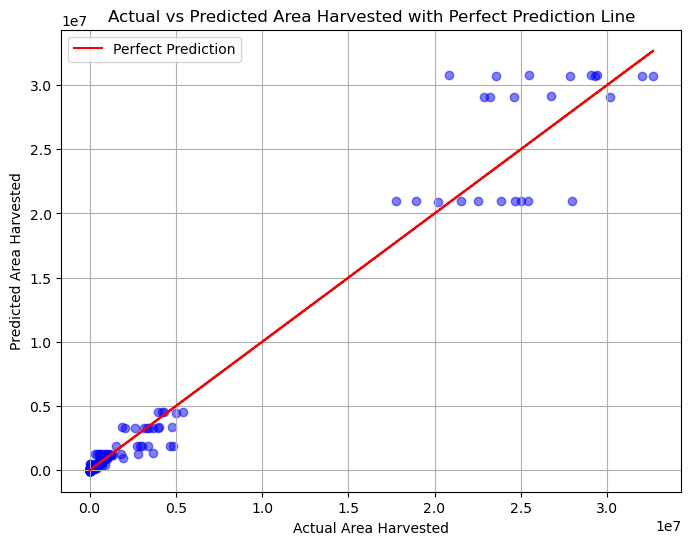

In [67]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Area Harvested with Perfect Prediction Line')
plt.xlabel('Actual Area Harvested')
plt.ylabel('Predicted Area Harvested')
plt.legend()
plt.grid(True)
plt.show()


### Total Accuracy of all models

In [68]:
yield_accuracy

0.9369315117506353

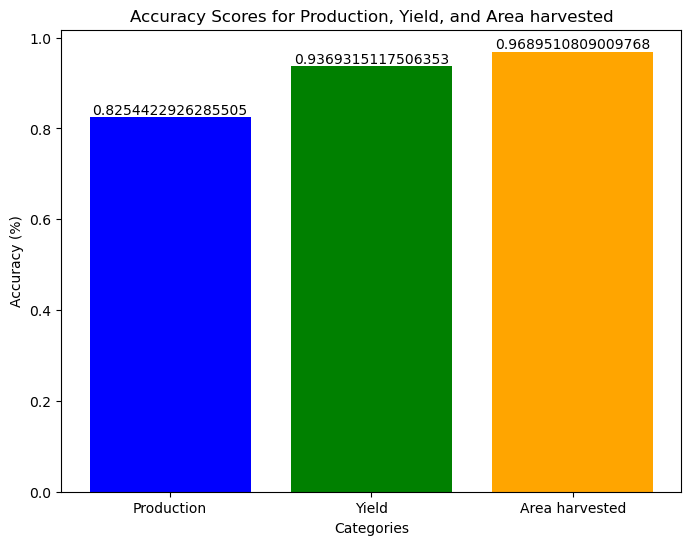

In [69]:
plt.figure(figsize=(8, 6))
bars = plt.bar(['Production', 'Yield', 'Area harvested'], [Production_accuracy, yield_accuracy, Area_harvested_accuracy], color=['blue', 'green', 'orange'])
plt.xlabel('Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Scores for Production, Yield, and Area harvested')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', va='bottom', ha='center')



plt.show()

## Forecasting

In [70]:
train_data = crop_data_encoded[crop_data_encoded['Year'] <= 2015]  # Data until 2015 for training
test_data = crop_data_encoded[crop_data_encoded['Year'] > 2015]    # Data after 2015 for forecasting and Testing


In [71]:
X_train = train_data.drop(columns=['Yield', 'Production', 'Area harvested'])
y_train = train_data['Yield']

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [72]:
X_test = test_data.drop(columns=['Yield', 'Production', 'Area harvested'])

y_pred = model.predict(X_test)


In [73]:
y_actual = test_data['Yield']

mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"Mean Squared Error (MSE) on forecasted period: {mse}")
print(f"R-squared (R2) on forecasted period: {r2}")


Mean Squared Error (MSE) on forecasted period: 6.467284779373931e+29
R-squared (R2) on forecasted period: -1.5951761252457572e+19


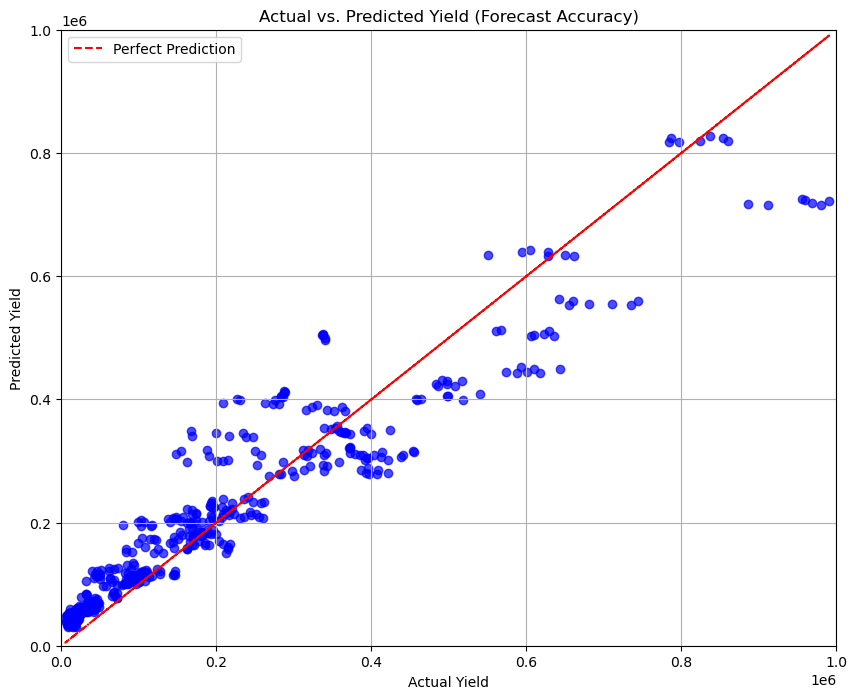

In [74]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(test_data['Yield'], y_pred, color='blue', alpha=0.7)
plt.plot(test_data['Yield'], test_data['Yield'], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Forecast Accuracy)')
plt.legend()
plt.grid(True)

plt.xlim(0, 1000000)
plt.ylim(0, 1000000)


plt.show()


# Taking Economics Data

In [76]:
eco_df = pd.read_excel(input_folder+'Cleaned_GDP_and_Components.xlsx')

In [78]:
eco_df.head()

,Year,"Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency","Government Consumption Expenditure, Nominal, Domestic Currency","Exports of Goods and Services, Nominal, Domestic Currency","Gross Domestic Product, Real, Domestic Currency"
0,1980,1750667.5,453649.8,280771.8,7257316.5
1,1981,1933951.0,507041.3,305239.0,7441485.0
2,1982,2071256.3,554529.5,283209.8,7307314.0
3,1983,2281604.5,595393.0,276996.3,7642265.5
4,1984,2492340.3,634727.8,302380.5,8195295.3


In [79]:
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Year                                                                         43 non-null     int64  
 1   Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency  43 non-null     float64
 2   Government Consumption Expenditure, Nominal, Domestic Currency               43 non-null     float64
 3   Exports of Goods and Services, Nominal, Domestic Currency                    43 non-null     float64
 4   Gross Domestic Product, Real, Domestic Currency                              43 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.8 KB


In [80]:
eco_df.nunique()

Year                                                                           43
Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency    43
Government Consumption Expenditure, Nominal, Domestic Currency                 43
Exports of Goods and Services, Nominal, Domestic Currency                      43
Gross Domestic Product, Real, Domestic Currency                                43
dtype: int64

In [84]:
eco_df.describe()

,Year,"Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency","Government Consumption Expenditure, Nominal, Domestic Currency","Exports of Goods and Services, Nominal, Domestic Currency","Gross Domestic Product, Real, Domestic Currency"
count,43.000000,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,2001.000000,7.668228e+06,1.716812e+06,1.275030e+06,1.401939e+07
std,12.556539,4.348538e+06,8.926368e+05,8.206298e+05,4.413632e+06
min,1980.000000,1.750668e+06,4.536498e+05,2.769963e+05,7.257316e+06
25%,1990.500000,3.876222e+06,9.765215e+05,5.734018e+05,1.004968e+07
50%,2001.000000,7.073801e+06,1.538151e+06,1.026812e+06,1.423073e+07
75%,2011.500000,1.087311e+07,2.513375e+06,2.132988e+06,1.724758e+07
max,2022.000000,1.751174e+07,3.570077e+06,2.995046e+06,2.182204e+07


In [ ]:
num_vars = [fea for fea in eco_df.columns if crop_df[fea].dtypes != 'O']
categ_vars =[fea for fea in eco_df.columns if crop_df[fea].dtypes == 'O']


In [82]:
eco_df.head()

,Year,"Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency","Government Consumption Expenditure, Nominal, Domestic Currency","Exports of Goods and Services, Nominal, Domestic Currency","Gross Domestic Product, Real, Domestic Currency"
0,1980,1750667.5,453649.8,280771.8,7257316.5
1,1981,1933951.0,507041.3,305239.0,7441485.0
2,1982,2071256.3,554529.5,283209.8,7307314.0
3,1983,2281604.5,595393.0,276996.3,7642265.5
4,1984,2492340.3,634727.8,302380.5,8195295.3


In [83]:
print(eco_df.isnull().sum()) 

Year                                                                           0
Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency    0
Government Consumption Expenditure, Nominal, Domestic Currency                 0
Exports of Goods and Services, Nominal, Domestic Currency                      0
Gross Domestic Product, Real, Domestic Currency                                0
dtype: int64


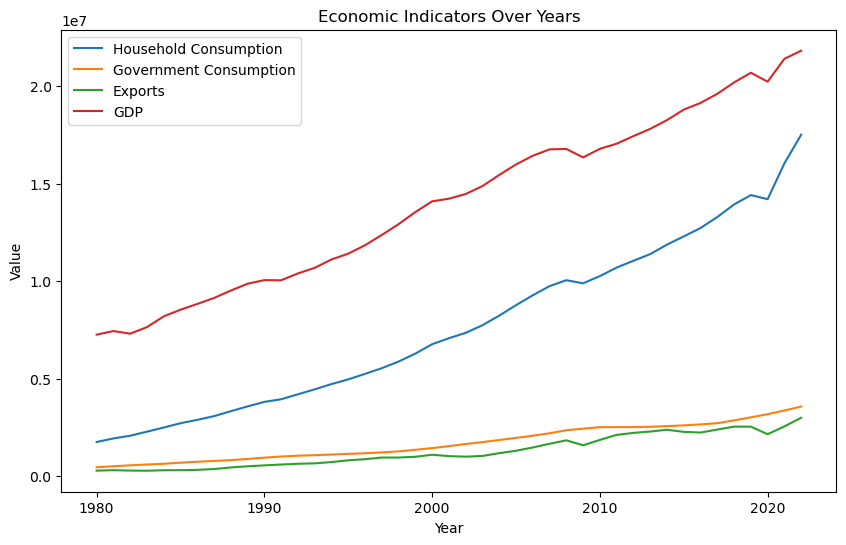

In [85]:
plt.figure(figsize=(10, 6))

# Line plot for Household Consumption Expenditure
plt.plot(eco_df['Year'], eco_df['Household Consumption Expenditure, incl. NPISHs, Nominal, Domestic Currency'], label='Household Consumption')

# Line plot for Government Consumption Expenditure
plt.plot(eco_df['Year'], eco_df['Government Consumption Expenditure, Nominal, Domestic Currency'], label='Government Consumption')

# Line plot for Exports of Goods and Services
plt.plot(eco_df['Year'], eco_df['Exports of Goods and Services, Nominal, Domestic Currency'], label='Exports')

# Line plot for Gross Domestic Product
plt.plot(eco_df['Year'], eco_df['Gross Domestic Product, Real, Domestic Currency'], label='GDP')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Economic Indicators Over Years')
plt.legend()
plt.show()


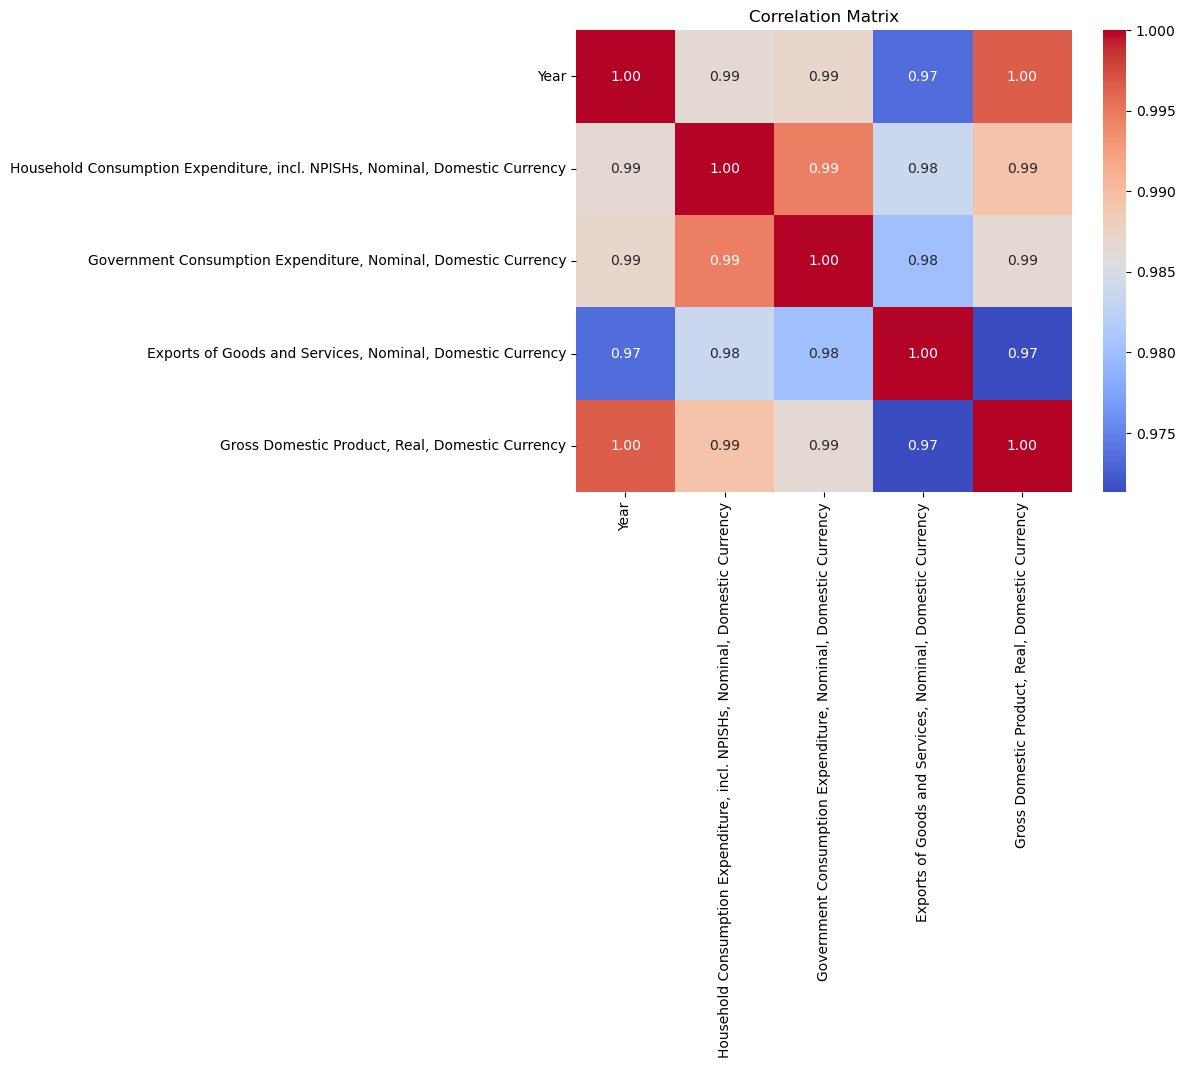

In [86]:
corr_matrix = eco_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [87]:
crop_data

,Item,Year,Area harvested,Yield,Production
0,"Almonds, in shell",1980,132250.0,18137.0,239858.0
1,"Almonds, in shell",1981,132010.0,22980.0,303361.0
2,"Almonds, in shell",1982,137190.0,18748.0,257200.0
3,"Almonds, in shell",1983,145680.0,12356.0,180000.0
4,"Almonds, in shell",1984,154180.0,28473.0,439000.0
...,...,...,...,...,...
3385,Wheat,2018,16030580.0,32005.0,51305540.0
3386,Wheat,2019,15132980.0,34746.0,52580890.0
3387,Wheat,2020,14888140.0,33417.0,49751180.0
3388,Wheat,2021,15032210.0,29805.0,44803690.0
